In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import dill as pickle
import traceback
import math
from pathlib import Path
from functools import reduce

from io import StringIO

## Experiment III

In [2]:
dids = []
artifact = []
plot = np.zeros((5, 5))
win = np.zeros((5, 5), dtype=int)
for i in range(5):
    for j in range(5):
        try:
            f = Path(f'intermediates/result_{i+1}_{j+1}.pkl')
            if not f.exists():
                continue
            with open(f, 'rb') as file:
                data = pickle.load(file)
                for k, v in data.items():
                    if v:
                        dids.append(k)
                    else:
                        artifact.append((i+1, j+1, k))
            
#             print(data)
            tmp = [min(list(map(lambda x: x[2], v))) for k, v in data.items() if v and k not in [23517, 40978, 41027, 50, 1486]]
            s = sum(np.array(tmp) < 16)
            print(i+1, j+1, s, len(tmp), 1.* s / len(tmp))
            plot[i, j] = 1.* s / len(tmp)
            win[i, j] = sum(np.array(tmp) == 1)
#             win[i, j] = sum(data.values())
#             /np.percentile(tmp, q=np.arange(0, 105, 5))
        except:
            traceback.print_exc()
            continue

from collections import Counter
count = Counter(dids)
for k, v in count.items():
    if v < 25:
        print(k, v)
print(list(set(artifact)))
Counter([c for a, b, c in artifact])

plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(12, 5))
# ax = fig.add_subplot(111)
# ax = fig.axes[0]
ax.matshow(plot, cmap=plt.cm.PuBu, aspect="auto")
for i in range(5):
    for j in range(5):
        c = plot[j,i]
        g = win[i, j]
        ax.text(i, j, str(100*c).split('.')[0] + "% (" + str(g) + ")", va='center', ha='center', color='k' if (j == 0) and (i < 2) else 'white')
ax.set_xticklabels([0, 1, 2, 3, 4,5 ])
ax.set_yticklabels([0, 1, 2, 3, 4,5 ])
ax.set_ylabel('# suggested candidates, n')
ax.set_xlabel('# iterations per candidate, k')
ax.xaxis.set_label_position('bottom')
# ax.xaxis.tick_top()
# plt.colorbar(ax)
ax.set_title('% top-15 (# top-1) performing candidates found')
plt.tight_layout()
plt.savefig('exp-3.pdf', dpi=600, bbox_inches='tight')
plt.close(fig)

1 1 55 63 0.873015873015873
1 2 57 63 0.9047619047619048
1 3 59 63 0.9365079365079365
1 4 60 63 0.9523809523809523
1 5 61 63 0.9682539682539683
2 1 59 63 0.9365079365079365
2 2 61 63 0.9682539682539683
2 3 61 63 0.9682539682539683
2 4 61 63 0.9682539682539683
2 5 63 63 1.0
3 1 59 63 0.9365079365079365
3 2 62 63 0.9841269841269841
3 3 62 63 0.9841269841269841
3 4 62 63 0.9841269841269841
3 5 63 63 1.0
4 1 61 63 0.9682539682539683
4 2 63 63 1.0
4 3 63 63 1.0
4 4 63 63 1.0
4 5 63 63 1.0
5 1 61 63 0.9682539682539683
5 2 63 63 1.0
5 3 63 63 1.0
5 4 63 63 1.0
5 5 63 63 1.0
23517 17
40978 9
41027 24
50 24
1486 24
[(5, 4, 40978), (2, 5, 50), (4, 4, 23517), (3, 3, 40978), (3, 4, 23517), (1, 1, 1486), (4, 1, 40978), (2, 4, 40978), (4, 3, 40978), (5, 1, 40978), (5, 3, 40978), (5, 4, 23517), (3, 5, 40978), (4, 5, 40978), (5, 5, 41027), (5, 5, 40978), (4, 3, 23517), (5, 3, 23517), (3, 5, 23517), (4, 2, 40978), (4, 5, 23517), (2, 5, 40978), (4, 4, 40978), (5, 2, 40978), (5, 5, 23517), (3, 2, 40978),

<ipython-input-2-4042e28c9b8d>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1, 2, 3, 4,5 ])
<ipython-input-2-4042e28c9b8d>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 2, 3, 4,5 ])


## Experiment V

breadth-first
[0, 7, 17, 26, 29, 32, 34, 35, 36, 36, 39, 41, 41, 42, 42, 44, 46, 46, 46, 46]
[0.0, 0.15217391304347827, 0.3695652173913043, 0.5652173913043478, 0.6304347826086957, 0.6956521739130435, 0.7391304347826086, 0.7608695652173914, 0.782608695652174, 0.782608695652174, 0.8478260869565217, 0.8913043478260869, 0.8913043478260869, 0.9130434782608695, 0.9130434782608695, 0.9565217391304348, 1.0, 1.0, 1.0, 1.0]
depth-first
[0, 15, 15, 36, 36, 47, 47, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51]
[0.0, 0.29411764705882354, 0.29411764705882354, 0.7058823529411765, 0.7058823529411765, 0.9215686274509803, 0.9215686274509803, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
a-star
[0, 7, 16, 24, 27, 31, 31, 32, 34, 34, 34, 35, 35, 35, 36, 37, 37, 39, 39, 40]
[0.0, 0.175, 0.4, 0.6, 0.675, 0.775, 0.775, 0.8, 0.85, 0.85, 0.85, 0.875, 0.875, 0.875, 0.9, 0.925, 0.925, 0.975, 0.975, 1.0]
random
[0, 31, 34, 38, 42, 42, 44, 45, 45, 45, 48, 49, 50, 52, 52, 52, 52, 54, 55, 55

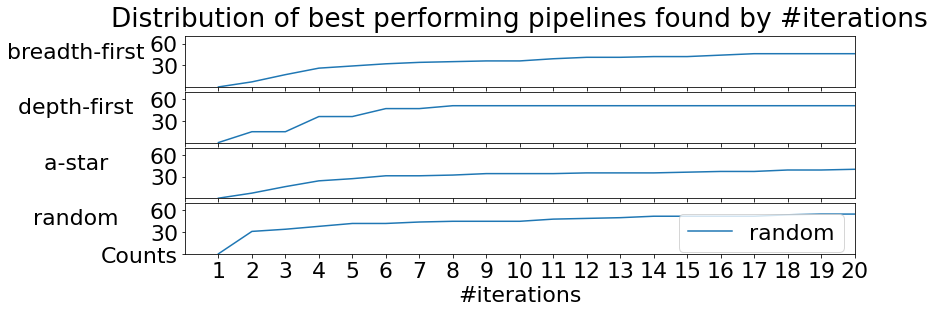

In [8]:
from collections import Counter
import matplotlib.gridspec as gridspec

gs1 = gridspec.GridSpec(4, 1)
gs1.update(wspace=0.1, hspace=0.1) # set the spacing between axes. 

plt.rcParams['font.size'] = 22
# fig = plt.figure(figsize = (14, 4))
# ax = plt.subplot()
f, ax = plt.subplots(4, 1, figsize = (12, 4), sharex=True, sharey=True)
# ax = plt.subplot(gs1[idx])
for idx, fname in enumerate(['breadth-first', 'depth-first', 'a-star', 'random']):
    ax = plt.subplot(gs1[idx])
    print(fname)
    with open(f'intermediates/result_final_{fname}.pkl', 'rb') as file:
        data = pickle.load(file)
#     print(fname, data)
    res = []
    for _, values in data.items():
        if not values:
            continue
        tmp = [v[1] for v in values]
        if pd.isna(tmp).all():
            continue
        res.append(np.nanargmax(tmp))
    count = Counter(res)
#     print(count.items())
    y = [0]*20
    for i in range(20):
        y[i] = sum([count.get(k, 0) for k in range(i)])
    print(y)
    print([float(i)/y[-1] for i in y])
    plt.plot(list(range(1, 21)), y, label=fname)
    spaces = "      " if fname == 'random' else "                    "
    ax.set_ylabel(fname+spaces, rotation=0)
    ax.xaxis.set_label_position('bottom')
    ax.set_xlim([1, 20])
    ax.set_ylim([0, 70])
    if idx == 0:
        ax.set_title('Distribution of best performing pipelines found by #iterations', y=1.08)
    if idx == 3:
        ax.set_yticks([0, 30, 60])
        ax.set_yticklabels(["Counts", "30", "60"])
        ax.set_xticks(range(1, 21))
    else:
        ax.set_yticks([30, 60])
        ax.set_yticklabels([30, 60])
        ax.set_xticks(range(0, 20))
        ax.set_xticklabels([])
    
plt.xticks(list(range(1, 21)))
plt.xlim([0, 20])
# plt.show()
# plt.tight_layout()
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(-0.04, 0.5, 'Search strategies', va='center', rotation='vertical')
plt.xlabel('#iterations')
plt.legend()
# plt.ylabel()
plt.savefig('exp-5i.pdf', dpi=600, bbox_inches='tight')

## Experiment VI

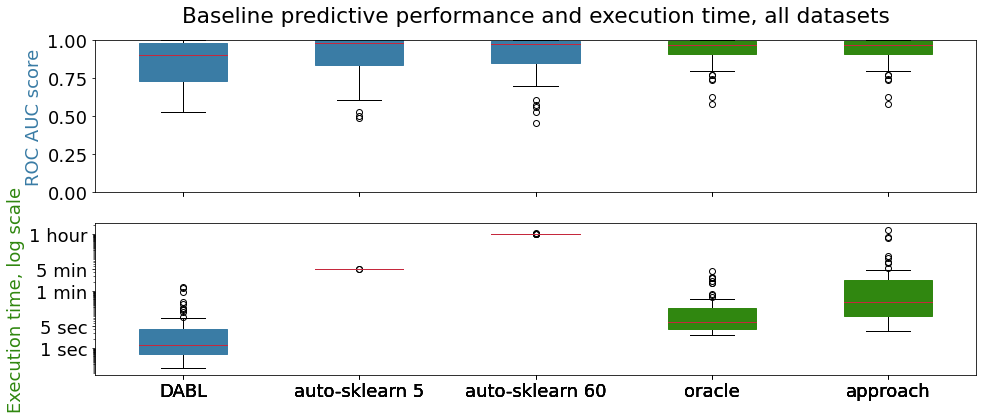

In [4]:
inp = {
    'DABL': """0.9870,0.0270,0.9295,0.0012
1.0158,0.0066,0.7702,0.0300
1.0150,0.0034,0.6908,0.0731
0.5221,0.1016,0.7284,0.0867
0.7196,0.1376,0.7462,0.0384
0.6067,0.1568,0.7371,0.0877
0.3916,0.0039,0.7269,0.0308
13.9024,0.2614,0.9982,0.0007
1.5174,0.0155,0.9744,0.0010
6.0869,1.9797,0.5876,0.1651
0.2493,0.0150,0.9996,0.0002
0.4363,0.0064,0.6997,0.0592
1.8573,0.0111,0.9587,0.0024
2.4365,0.0658,0.6903,0.0057
56.6707,1.1014,0.9962,0.0010
0.3600,0.0061,0.7532,0.0000
9.7153,0.0681,0.7722,0.0439
18.5507,2.0055,0.9750,0.0059
0.8235,0.0224,0.8973,0.0101
0.3442,0.0010,0.8655,0.0015
0.9045,0.0044,0.9017,0.0152
1.0692,0.0848,0.9599,0.0132
0.5283,0.0310,0.9932,0.0050
8.7457,0.1534,0.9946,0.0001
1.5769,0.1769,0.7152,0.0081
0.3187,0.0169,0.9953,0.0010
7.7726,0.3404,0.9037,0.0007
1.3255,0.0354,0.9962,0.0002
1.3701,0.0388,0.9638,0.0037
2.3823,0.0243,0.9751,0.0017
1.2720,0.0988,0.7350,0.0563
1.4200,0.0142,0.9822,0.0004
1.0096,0.0011,0.6872,0.0171
0.6481,0.0055,0.5753,0.0112
4.5159,0.1421,0.5307,0.0002
16.0487,0.5860,0.9989,0.0000
0.5512,0.0075,0.8691,0.0195
0.7550,0.0548,0.9798,0.0081
74.1946,0.2268,0.9989,0.0001
0.9934,0.0535,0.7157,0.0043
0.6935,0.0292,0.7621,0.0039
3.2760,0.1413,0.9946,0.0013
0.4480,0.0074,0.8320,0.0240
5.9998,0.4184,0.9924,0.0029
0.7978,0.0597,0.9370,0.0369
4.1026,0.4232,0.9999,0.0000
27.9168,2.6322,0.6943,0.0107
7.3569,0.5643,0.9914,0.0003
1.1017,0.0308,0.8585,0.0112
161.8511,6.0525,nan,nan
53.1328,0.6259,nan,nan
1.1581,0.2005,0.8147,0.0278
1.0538,0.0661,0.6800,0.1172
1.9731,0.2649,0.8356,0.0099
17.1115,0.6235,0.9979,0.0006
1.7129,0.1745,0.8459,0.0283
0.3536,0.0089,0.9687,0.0102
0.8873,0.0085,0.9699,0.0021
0.2981,0.0061,0.9387,0.0062
8.4140,3.4192,0.6833,0.0066
23.4972,2.5986,0.7998,0.0037
0.5916,0.0204,0.9588,0.0028
1.4751,0.0933,0.9609,0.0130
1.7414,0.0911,0.6704,0.0193
2.7562,0.0129,0.9997,0.0003
3.8202,0.0396,0.9922,0.0025
0.6107,0.0030,0.5396,0.0029
0.3795,0.0126,0.8537,0.1009
1.3860,0.0740,0.9159,0.0047
84.4591,8.0895,0.9936,0.0000
0.6405,0.0425,0.5579,0.0346""",
    'auto-sklearn 5': """301.7387,3.1660,0.8401,0.1009
298.4012,1.1407,0.7594,0.0254
299.3002,0.0483,0.7785,0.0215
298.2074,0.3555,0.9278,0.0211
299.4811,0.0458,0.9984,0.0008
299.3205,1.2349,0.9820,0.0006
4.2753,1.4550,nan,nan
297.1764,0.5597,1.0000,0.0000
298.5180,0.0371,0.7771,0.0222
297.9592,0.0228,0.9965,0.0003
299.1503,0.0975,0.7852,0.0037
298.9613,0.3149,0.9956,0.0009
2.8705,0.0668,nan,nan
298.9908,0.1391,0.9020,0.0115
300.6540,0.8625,0.9748,0.0121
298.0858,1.5769,0.8918,0.0109
297.7150,1.2017,0.5000,0.0000
298.6302,0.1445,0.9188,0.0164
298.9175,0.2706,0.9998,0.0002
301.4510,0.1235,0.9927,0.0052
297.6949,1.4934,0.9939,0.0007
303.1460,1.5097,0.7363,0.0095
297.5394,1.1092,0.9948,0.0004
2.7371,0.0491,nan,nan
299.3495,0.4445,0.9975,0.0001
299.5381,0.7720,0.9619,0.0012
298.7963,0.4692,0.9879,0.0021
3.3281,0.2302,nan,nan
298.7868,0.0192,0.9784,0.0013
298.3290,2.2050,0.7315,0.0088
2.7446,0.0581,nan,nan
304.6777,0.7944,0.5314,0.0003
299.7641,0.1551,0.9993,0.0000
3.0322,0.1351,nan,nan
4.1454,1.3014,nan,nan
298.6398,0.3052,0.9987,0.0001
2.8628,0.0170,nan,nan
2.7378,0.0522,nan,nan
298.2809,0.1973,0.4871,0.0106
297.3866,0.1270,0.7293,0.0204
299.4877,1.5106,0.9168,0.0007
299.0853,0.2314,0.7363,0.0679
300.4603,0.3097,0.6050,0.0235
297.1217,1.0415,0.9140,0.0058
301.1182,0.1982,0.9794,0.0049
299.6584,0.8415,0.9423,0.0042
298.7415,0.4602,0.7798,0.0076
299.3473,0.3256,0.9991,0.0006
298.5045,1.0104,0.8385,0.0275
298.9939,0.2421,0.9939,0.0032
299.9874,0.1823,0.9955,0.0018
297.9007,0.9124,1.0000,0.0000
300.3923,0.4299,0.6988,0.0298
299.4828,0.3363,0.9939,0.0001
301.6155,1.7698,0.9200,0.0072
136.6374,1.4179,nan,nan
49.1771,0.1142,nan,nan
346.9214,14.2672,nan,nan
349.5405,0.0560,nan,nan
352.3586,1.2100,nan,nan
362.0512,3.6653,nan,nan
370.7704,0.8553,nan,nan
350.5297,2.4363,nan,nan
356.0352,0.8746,nan,nan
404.4420,46.6478,nan,nan
297.9501,0.0028,1.0000,0.0000
299.6205,0.3789,1.0000,0.0000
301.7281,1.3080,1.0000,0.0000
300.8016,0.2521,1.0000,0.0000
300.1746,0.3845,1.0000,0.0000
298.1756,0.2238,1.0000,0.0000
299.8288,0.3265,1.0000,0.0000
300.9907,0.0344,1.0000,0.0000
298.6825,1.0513,1.0000,0.0000
299.4888,0.0537,1.0000,0.0000
298.4416,0.4031,1.0000,0.0000
301.4734,1.5907,1.0000,0.0000""",
    'auto-sklearn 60': """1461,3605.9185,0.4576
1462,3597.0512,1.0000
1464,3601.2359,1.0000
1468,3608.1359,0.9592
1475,3608.9313,0.7896
1478,3603.2564,0.9968
1480,3610.6867,0.7286
1485,3603.3908,0.8828
1486,3605.8500,0.9785
1487,3604.3547,0.8967
1489,3599.0483,0.9482
1494,3602.1710,0.9127
1497,3605.2691,0.9998
15,3599.9966,0.9933
1501,3603.8908,0.9953
151,3610.4232,0.7945
1510,3604.2792,0.9948
1590,3602.2859,0.9172
16,3608.9604,0.9983
18,3601.9131,0.9679
182,3601.2837,0.9889
188,3599.0834,0.7020
22,3598.5245,0.9809
23,3600.1132,0.7240
23381,3602.0899,0.6084
23517,3604.3029,0.5303
28,3600.9791,0.9992
29,3601.4129,0.9149
3,3602.2651,0.9847
300,3605.4102,0.9988
307,3937.6743,0.9487
31,3603.8604,0.7781
32,3602.7947,0.9996
37,3597.4777,0.8326
375,3605.5212,0.9940
38,3607.1933,0.9971
40499,3601.5391,1.0000
40668,3607.9272,0.7483
40670,3603.3176,0.9940
40701,3605.3598,0.9185
40927,48.4017,nan
40966,3603.7471,1.0000
40975,3596.9829,1.0000
40978,3611.7451,1.0000
40979,3609.7217,1.0000
40982,3591.5559,1.0000
40983,3600.3579,1.0000
40984,3601.6078,1.0000
40994,3589.3373,1.0000
41027,3591.3926,0.7019
4134,3598.2244,0.8535
44,3598.4382,0.9741
4534,3603.8334,0.9703
4538,3600.5986,0.7012
458,3615.6425,0.9969
46,3620.4022,0.9939
469,3613.7435,0.5753
50,3586.6496,0.8588
54,3623.6224,0.9270
6,3607.3791,0.9987
6332,3608.5316,0.5619
""",
     'oracle': """1049,4.178683949407334,0.942284058988764
1050,4.432849895320689,0.856570111111111
1053,13.07244450055005,0.7698081111111111
1063,2.8270766186070504,0.8320340767948797
1067,4.8499711404701245,0.8457023333333334
1068,8.442665712181867,0.865323
11,2.89490112499476,0.99999375
12,30.2353193853352,0.9993
1461,45.73793658848416,0.9293072439652204
1462,4.825056936738197,1.0
1464,2.6578404330857044,0.7453861720485195
1468,12.951076035453655,0.9958506944444444
1475,13.800001819025878,0.8734002464771028
1478,260.21190445264426,0.9996468924268176
1480,3.863039119026388,0.7752705555555556
1485,35.98359884408428,0.9297146449704144
1486,106.4059252320412,0.994185
1487,6.611750963676621,0.9117619205232002
1489,5.983070276181367,0.966259354002966
1494,3.904004707353857,0.9327430036488724
1497,7.550238986233378,0.9999794928394578
15,3.6871642177140127,0.9928790157458912
1501,17.326836010440026,0.999038
151,19.97755081797711,0.9615070161653354
1510,4.069258383353473,0.9949262723957508
1590,163.27884688737387,0.922927
18,4.872834742327451,0.967471111111111
182,51.492559556987416,0.99278
188,4.125466710538522,0.9108875282367176
22,40.309851151995076,0.9883613333333332
23,3.9154064823904746,0.7413869999999999
23381,2.984704459590825,0.6285245393176427
28,23.806159136400904,0.999905
29,3.814195027347278,0.9319580125399832
300,155.02663615875005,0.9996388001479038
307,123.46757319456117,0.9998
31,6.373932831937829,0.7993531666666667
32,13.670061505497491,0.99978096313872
37,3.801675128672256,0.8284827825242405
375,11.440358169748205,0.9999587480603233
38,3.524893753530306,0.994596116750279
40668,111.94434580686116,0.9216339524913508
40966,7.536090872168089,0.9998536127017054
40975,6.454889294184866,0.9994671749339754
40979,7.705771402358549,0.9989134404761904
40982,6.535296199832475,0.9500501290116358
40983,7.108074172254189,0.9900466123064312
40984,6.585114096409608,0.9957263107263108
40994,6.701877053217728,0.9519890864284456
41027,9.432685055393097,0.9558426446500592
4134,160.66304836250686,0.8815239249939386
44,8.938519845996584,0.9880155755754344
4534,10.832669999201707,0.9967635762833592
4538,20.273346151611364,0.917083
458,4.337261927267292,0.9999155191525034
46,6.050913315632659,0.995029
469,2.733975314465435,0.5826640000000001
50,2.866809726104851,1.0
54,3.6496458436453443,0.962006
6,15.626160090839393,0.9997021681340932""",
    'approach': """x
}


colors = {
    "g": (48./255, 135./255, 16./255),
    "y": (255./255, 200./255, 87./255),
    "r": (197./255, 40./255, 61./255),
    "b": (58./255, 124./255, 165./255)
}


from matplotlib.transforms import Affine2D

# fig, ax1 = plt.subplots(figsize=(12, 4))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
# fig, ax1 = plt.subplots(111, figsize=(14, 3))
# fig, ax2 = plt.subplots(111, figsize=(14, 3))
plt.rcParams['font.size'] = 18
# ax2 = ax1.twinx()

column_names = {
    3: ['did', 'time', 'auc'],
    4: ['time', 'stime', 'auc', 'sauc'],
}

names, mtimes, stimes, maucs, saucs = [], [], [], [], []
for idx, (k, v) in enumerate(inp.items()):
    if not v:
        continue
    columns = column_names.get(len(v.splitlines()[0].split(',')))
    df = pd.read_csv(StringIO(v.replace(' ', ',')), names=columns).dropna()
#     df.boxplot(ax=ax1)
#     time = [float(l.split(',')[0]) for l in v.splitlines()]
    mtime = np.nanmedian(df.time)
    stime = np.nanstd(df.time)
#     auc = [float(l.split(',')[2]) for l in v.splitlines()]
#     mauc = np.nanmean(df.auc)
#     sauc = np.nanstd(df.auc)
    names.append(k)
    mtimes.append(df.time)
    maucs.append(df.auc)
    stimes.append(stime)
#     saucs.append(sauc)
# print(names, mtimes, maucs)

# x = range(1, len(names) + 1)
# eaucs = np.array([[a-b, a+b] for a, b in zip(maucs, saucs)])
# etimes = np.array([[a-b, a+b] for a, b in zip(mtimes, stimes)])

box1 = ax1.boxplot(maucs[:3] + [[0], [0]], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])

box2 = ax1.boxplot([[0], [0], [0]] + maucs[3:], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
        
# trans1 = Affine2D().translate(-0.3, 0.0) + ax2.transData
# ax2.boxplot(mtimes, patch_artist=True)

box1 = ax2.boxplot(mtimes[:3] + [[0], [0]], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])

box2 = ax2.boxplot([[0], [0], [0]] + mtimes[3:], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
        
# ax2.set_ylim([0, 60])
ax2.set_yscale('log', base=60)
ax2.set_yticks([1, 5, 60, 300, 3600])
ax2.set_yticklabels(['1 sec', '5 sec', '1 min', '5 min', '1 hour'])
ax2.get_yaxis().get_major_formatter().labelOnlyBase = False
# ax2.grid()

ax1.set_xlabel('')
ax1.set_xticklabels(names*4)
ax1.set_ylabel('ROC AUC score', color=colors['b'])
ax2.set_ylabel('Execution time, log scale', color=colors['g'])
# ax1.grid()
ax1.set_title('Baseline predictive performance and execution time, all datasets', y=1.08)
# plt.show()
plt.tight_layout()
plt.savefig('exp-6-all.pdf', dpi=600, bbox_inches='tight')

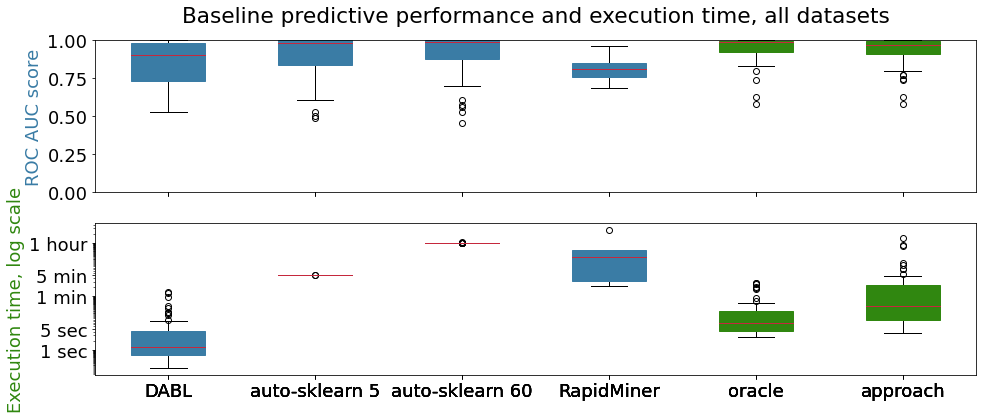

In [16]:
inp = {
    'DABL': """1049,0.9870,0.9295
1050,1.0158,0.7702
1053,1.0150,0.6908
1063,0.5221,0.7284
1067,0.7196,0.7462
1068,0.6067,0.7371
11,0.3916,0.7269
12,13.9024,0.9982
14,1.5174,0.9744
1461,6.0869,0.5876
1462,0.2493,0.9996
1464,0.4363,0.6997
1468,1.8573,0.9587
1475,2.4365,0.6903
1478,56.6707,0.9962
1480,0.3600,0.7532
1485,9.7153,0.7722
1486,18.5507,0.9750
1487,0.8235,0.8973
1489,0.3442,0.8655
1494,0.9045,0.9017
1497,1.0692,0.9599
15,0.5283,0.9932
1501,8.7457,0.9946
151,1.5769,0.7152
1510,0.3187,0.9953
1590,7.7726,0.9037
16,1.3255,0.9962
18,1.3701,0.9638
182,2.3823,0.9751
188,1.2720,0.7350
22,1.4200,0.9822
23,1.0096,0.6872
23381,0.6481,0.5753
23517,4.5159,0.5307
28,16.0487,0.9989
29,0.5512,0.8691
3,0.7550,0.9798
300,74.1946,0.9989
307,0.9934,0.7157
31,0.6935,0.7621
32,3.2760,0.9946
37,0.4480,0.8320
375,5.9998,0.9924
38,0.7978,0.9370
40499,4.1026,0.9999
40668,27.9168,0.6943
40670,7.3569,0.9914
40701,1.1017,0.8585
40923,161.8511,nan
40927,53.1328,nan
40966,1.1581,0.8147
40975,1.0538,0.6800
40978,1.9731,0.8356
40979,17.1115,0.9979
40982,1.7129,0.8459
40983,0.3536,0.9687
40984,0.8873,0.9699
40994,0.2981,0.9387
41027,8.4140,0.6833
4134,23.4972,0.7998
44,0.5916,0.9588
4534,1.4751,0.9609
4538,1.7414,0.6704
458,2.7562,0.9997
46,3.8202,0.9922
469,0.6107,0.5396
50,0.3795,0.8537
54,1.3860,0.9159
6,84.4591,0.9936
6332,0.6405,0.5579""",
    'auto-sklearn 5': """1063,301.7387,0.8401
1067,298.4012,0.7594
1068,299.3002,0.7785
11,298.2074,0.9278
12,299.4811,0.9984
14,299.3205,0.9820
1461,4.2753,nan
1462,297.1764,1.0000
1464,298.5180,0.7771
1468,297.9592,0.9965
1475,299.1503,0.7852
1478,298.9613,0.9956
1480,2.8705,nan
1485,298.9908,0.9020
1486,300.6540,0.9748
1487,298.0858,0.8918
1489,297.7150,0.5000
1494,298.6302,0.9188
1497,298.9175,0.9998
15,301.4510,0.9927
1501,297.6949,0.9939
151,303.1460,0.7363
1510,297.5394,0.9948
1590,2.7371,nan
16,299.3495,0.9975
18,299.5381,0.9619
182,298.7963,0.9879
188,3.3281,nan
22,298.7868,0.9784
23,298.3290,0.7315
23381,2.7446,nan
23517,304.6777,0.5314
28,299.7641,0.9993
29,3.0322,nan
3,4.1454,nan
300,298.6398,0.9987
307,2.8628,nan
31,2.7378,nan
1461,298.2809,0.4871
1480,297.3866,0.7293
1590,299.4877,0.9168
188,299.0853,0.7363
23381,300.4603,0.6050
29,297.1217,0.9140
3,301.1182,0.9794
307,299.6584,0.9423
31,298.7415,0.7798
32,299.3473,0.9991
37,298.5045,0.8385
375,298.9939,0.9939
38,299.9874,0.9955
40499,297.9007,1.0000
40668,300.3923,0.6988
40670,299.4828,0.9939
40701,301.6155,0.9200
40923,136.6374,nan
40927,49.1771,nan
40966,346.9214,nan
40975,349.5405,nan
40978,352.3586,nan
40979,362.0512,nan
40982,370.7704,nan
40983,350.5297,nan
40984,356.0352,nan
40994,404.4420,nan
41027,297.9501,1.0000
4134,299.6205,1.0000
44,301.7281,1.0000
4534,300.8016,1.0000
4538,300.1746,1.0000
458,298.1756,1.0000
46,299.8288,1.0000
469,300.9907,1.0000
50,298.6825,1.0000
54,299.4888,1.0000
6,298.4416,1.0000
6332,301.4734,1.0000""",
    'auto-sklearn 60': """1049,3606.1644,1.0000
1050,3604.4877,1.0000
1053,3601.8430,1.0000
1063,3605.0103,1.0000
1067,3609.3747,1.0000
1068,3608.3268,1.0000
11,3609.4671,1.0000
12,3601.3859,1.0000
14,4.2064,nan
1461,3605.9185,0.4576
1462,3597.0512,1.0000
1464,3601.2359,1.0000
1468,3608.1359,0.9592
1475,3608.9313,0.7896
1478,3603.2564,0.9968
1480,3610.6867,0.7286
1485,3603.3908,0.8828
1486,3605.8500,0.9785
1487,3604.3547,0.8967
1489,3599.0483,0.9482
1494,3602.1710,0.9127
1497,3605.2691,0.9998
15,3599.9966,0.9933
1501,3603.8908,0.9953
151,3610.4232,0.7945
1510,3604.2792,0.9948
1590,3602.2859,0.9172
16,3608.9604,0.9983
18,3601.9131,0.9679
182,3601.2837,0.9889
188,3599.0834,0.7020
22,3598.5245,0.9809
23,3600.1132,0.7240
23381,3602.0899,0.6084
23517,3604.3029,0.5303
28,3600.9791,0.9992
29,3601.4129,0.9149
3,3602.2651,0.9847
300,3605.4102,0.9988
307,3937.6743,0.9487
31,3603.8604,0.7781
32,3602.7947,0.9996
37,3597.4777,0.8326
375,3605.5212,0.9940
38,3607.1933,0.9971
40499,3601.5391,1.0000
40668,3607.9272,0.7483
40670,3603.3176,0.9940
40701,3605.3598,0.9185
40927,48.4017,nan
40966,3603.7471,1.0000
40975,3596.9829,1.0000
40978,3611.7451,1.0000
40979,3609.7217,1.0000
40982,3591.5559,1.0000
40983,3600.3579,1.0000
40984,3601.6078,1.0000
40994,3589.3373,1.0000
41027,3591.3926,0.7019
4134,3598.2244,0.8535
44,3598.4382,0.9741
4534,3603.8334,0.9703
4538,3600.5986,0.7012
458,3615.6425,0.9969
46,3620.4022,0.9939
469,3613.7435,0.5753
50,3586.6496,0.8588
54,3623.6224,0.9270
6,3607.3791,0.9987
6332,3608.5316,0.5619""",
    'RapidMiner': """300,2146,0.748
23381,131,0.832
38,2134,0.854
1068,346,0.685
1468,151,0.963
1485,9823,0.787""",
        'oracle': """1068,8.442665712181867,0.865323
1468,12.951076035453655,0.9958506944444444
1485,35.98359884408428,0.9297146449704144
1486,106.4059252320412,0.994185
1487,6.611750963676621,0.9117619205232002
1489,5.983070276181367,0.966259354002966
1494,3.904004707353857,0.9327430036488724
1497,7.550238986233378,0.9999794928394578
15,3.6871642177140127,0.9928790157458912
1501,17.326836010440026,0.999038
151,19.97755081797711,0.9615070161653354
1510,4.069258383353473,0.9949262723957508
1590,163.27884688737387,0.922927
18,4.872834742327451,0.967471111111111
182,51.492559556987416,0.99278
188,4.125466710538522,0.9108875282367176
22,40.309851151995076,0.9883613333333332
23,3.9154064823904746,0.7413869999999999
23381,2.984704459590825,0.6285245393176427
28,23.806159136400904,0.999905
29,3.814195027347278,0.9319580125399832
300,155.02663615875005,0.9996388001479038
307,123.46757319456117,0.9998
31,6.373932831937829,0.7993531666666667
32,13.670061505497491,0.99978096313872
37,3.801675128672256,0.8284827825242405
375,11.440358169748205,0.9999587480603233
38,3.524893753530306,0.994596116750279
40668,111.94434580686116,0.9216339524913508
40966,7.536090872168089,0.9998536127017054
40975,6.454889294184866,0.9994671749339754
40979,7.705771402358549,0.9989134404761904
40982,6.535296199832475,0.9500501290116358
40983,7.108074172254189,0.9900466123064312
40984,6.585114096409608,0.9957263107263108
40994,6.701877053217728,0.9519890864284456
41027,9.432685055393097,0.9558426446500592
4134,160.66304836250686,0.8815239249939386
44,8.938519845996584,0.9880155755754344
4534,10.832669999201707,0.9967635762833592
4538,20.273346151611364,0.917083
458,4.337261927267292,0.9999155191525034
46,6.050913315632659,0.995029
469,2.733975314465435,0.5826640000000001
50,2.866809726104851,1.0
54,3.6496458436453443,0.962006
6,15.626160090839393,0.9997021681340932""",
    'approach': """1049,33.06058527820098,0.942284058988764
1050,22.03048727224538,0.856570111111111
1053,104.97389905723425,0.7698081111111111
1063,6.776393194366038,0.8320340767948797
1067,18.949245339147414,0.8457023333333334
1068,18.93895633954539,0.865323
11,4.516329786993094,0.99999375
12,472.1508496413707,0.9993
1461,158.33689687892405,0.9293072439652204
1462,10.031120952720723,1.0
1464,3.5759150024726463,0.7453861720485195
1468,161.28032836822226,0.9958506944444444
1475,211.13247742437133,0.8734002464771028
1478,5043.026162354201,0.9996468924268176
1480,5.755608054213036,0.7752705555555556
1485,660.3497780138877,0.9297146449704144
1486,751.2651568460612,0.994185
1487,81.92019707657197,0.9117619205232002
1489,25.83227656285432,0.966259354002966
1494,9.207567501416738,0.9327430036488724
1497,52.16588011224079,0.9999794928394578
15,5.42413223750474,0.9928790157458912
1501,71.94490897297642,0.999038
151,261.062708095276,0.9615070161653354
1510,14.44766480604652,0.9949262723957508
1590,482.47613372212163,0.922927
18,28.97295141736506,0.967471111111111
182,201.2736530835168,0.99278
188,13.776778582947564,0.9108875282367176
22,327.5956485202412,0.9883613333333332
23,6.259826828757042,0.7413869999999999
23381,5.881721624564256,0.6285245393176427
28,125.53525032526744,0.999905
29,6.645938682474123,0.9319580125399832
300,2970.0183718070507,0.9996388001479038
307,8.449007103315948,0.9998
31,29.926712686367427,0.7993531666666667
32,84.31978524387873,0.99978096313872
37,8.520059294443275,0.8284827825242405
375,129.43078437408064,0.9999587480603233
38,13.342425203357585,0.994596116750279
40668,274.7325504430436,0.9216339524913508
40966,27.55803482543562,0.9998536127017054
40975,6.97091429785138,0.9994671749339754
40979,27.506725908270685,0.9989134404761904
40982,10.262754402838459,0.9500501290116358
40983,12.129491169410784,0.9900466123064312
40984,9.887940859924349,0.9957263107263108
40994,10.205117202053248,0.9519890864284456
41027,26.924720409616075,0.9558426446500592
4134,2736.1309479670676,0.8815239249939386
44,103.96993753501346,0.9880155755754344
4534,98.67378644147738,0.9967635762833592
4538,274.8963171346228,0.917083
458,19.86624908726173,0.9999155191525034
46,33.09643560269195,0.995029
469,3.652799494434297,0.5826640000000001
50,4.817869019924441,1.0
54,11.63277263318986,0.962006
6,113.31863176177993,0.9997021681340932""",
}


# colors = {
# #     "g": (168./255, 194./255, 86./255),
#     "g": (48./255, 135./255, 16./255),
#     "y": (255./255, 200./255, 87./255),
#     "r": (197./255, 40./255, 61./255),
#     "b": (58./255, 124./255, 165./255)
# }


# from matplotlib.transforms import Affine2D

# column_names = {
#     3: ['did', 'time', 'auc'],
#     4: ['time', 'stime', 'auc', 'sauc'],
# }

# names, mtimes, stimes, maucs, saucs = [], [], [], [], []
# for idx, (k, v) in enumerate(inp.items()):
#     if not v:
#         continue
#     columns = column_names.get(len(v.splitlines()[0].split(',')))
#     df = pd.read_csv(StringIO(v.replace(' ', ',')), names=columns).dropna()
#     df = df[df.did.isin([300, 23381, 38, 1068, 1468, 1485])]
# #     df.boxplot(ax=ax1)
# #     time = [float(l.split(',')[0]) for l in v.splitlines()]
#     mtime = np.nanmedian(df.time)
#     stime = np.nanstd(df.time)
# #     auc = [float(l.split(',')[2]) for l in v.splitlines()]
# #     mauc = np.nanmean(df.auc)
# #     sauc = np.nanstd(df.auc)
#     names.append(k)
#     mtimes.append(mtime)
#     maucs.append(df.auc)
#     stimes.append(stime)
# #     saucs.append(sauc)
# # print(names, mtimes, maucs)

# x = range(1, len(names) + 1)
# eaucs = np.array([[a-b, a+b] for a, b in zip(maucs, saucs)])
# print(mtimes)
# print(stimes)
# etimes = np.array([[a-b, a+b] for a, b in zip(mtimes, stimes)])


# # fig, ax1 = plt.subplots(figsize=(12, 4))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
# plt.rcParams['font.size'] = 18
# # ax2 = ax1.twinx()

# box1 = ax1.boxplot(maucs[:1] + [[0], [0]] + maucs[3:], patch_artist=True)
# ax1.set_ylim([0.7, 1])
# for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(box1[item], color=colors['b'])
# for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(box1[item], color=colors['r'])

# box2 = ax1.boxplot([[0]] + maucs[1:3] + [[0], [0], [0]], patch_artist=True)
# ax1.set_ylim([0.7, 1])
# for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(box2[item], color=colors['g'])
# for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
#     plt.setp(box2[item], color=colors['r'])

# ax1.set_title('Baseline predictive performance and execution time, 6 selected datasets', y=1.08)

# trans1 = Affine2D().translate(-0.3, 0.0) + ax2.transData
# print(etimes, etimes.transpose().reshape(2, -1))
# ax2.errorbar(x, mtimes, yerr=stimes, color=colors['g'])
# # ax2.set_ylim([0, 60])
# ax2.set_yscale('log', base=60)
# ax2.set_yticks([1, 5, 60, 300, 3600])
# ax2.set_yticklabels(['1 sec', '5 sec', '1 min', '5 min', '1 hour'])
# ax2.get_yaxis().get_major_formatter().labelOnlyBase = False
# # ax2.grid()

# ax1.set_xlabel('')
# ax1.set_xticklabels(names*2)
# ax1.set_ylabel('ROC AUC score', color=colors['b'])
# ax2.set_ylabel('Execution time, log scale', color=colors['g'])
# # ax2.grid()
# # plt.show()
# plt.tight_layout()
# plt.savefig('exp-6-6.pdf', dpi=600, bbox_inches='tight')

colors = {
    "g": (48./255, 135./255, 16./255),
    "y": (255./255, 200./255, 87./255),
    "r": (197./255, 40./255, 61./255),
    "b": (58./255, 124./255, 165./255)
}


from matplotlib.transforms import Affine2D

# fig, ax1 = plt.subplots(figsize=(12, 4))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
plt.rcParams['font.size'] = 18
# ax2 = ax1.twinx()

column_names = {
    3: ['did', 'time', 'auc'],
    4: ['time', 'stime', 'auc', 'sauc'],
}

names, mtimes, stimes, maucs, saucs = [], [], [], [], []
for idx, (k, v) in enumerate(inp.items()):
    if not v:
        continue
    columns = column_names.get(len(v.splitlines()[0].split(',')))
    df = pd.read_csv(StringIO(v.replace(' ', ',')), names=columns).dropna()
#     df.boxplot(ax=ax1)
#     time = [float(l.split(',')[0]) for l in v.splitlines()]
    mtime = np.nanmedian(df.time)
    stime = np.nanstd(df.time)
#     auc = [float(l.split(',')[2]) for l in v.splitlines()]
#     mauc = np.nanmean(df.auc)
#     sauc = np.nanstd(df.auc)
    names.append(k)
    mtimes.append(df.time)
    maucs.append(df.auc)
    stimes.append(stime)
#     saucs.append(sauc)
# print(names, mtimes, maucs)

# x = range(1, len(names) + 1)
# eaucs = np.array([[a-b, a+b] for a, b in zip(maucs, saucs)])
# etimes = np.array([[a-b, a+b] for a, b in zip(mtimes, stimes)])

box1 = ax1.boxplot(maucs[:4] + [[0], [0]], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])

box2 = ax1.boxplot([[0], [0], [0], [0]] + maucs[4:], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
        
# trans1 = Affine2D().translate(-0.3, 0.0) + ax2.transData
# ax2.boxplot(mtimes, patch_artist=True)

box1 = ax2.boxplot(mtimes[:4] + [[0], [0]], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])

box2 = ax2.boxplot([[0], [0], [0], [0]] + mtimes[4:], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
        
# ax2.set_ylim([0, 60])
ax2.set_yscale('log', base=60)
ax2.set_yticks([1, 5, 60, 300, 3600])
ax2.set_yticklabels(['1 sec', '5 sec', '1 min', '5 min', '1 hour'])
ax2.get_yaxis().get_major_formatter().labelOnlyBase = False
# ax2.grid()

ax1.set_xlabel('')
ax1.set_xticklabels(names*4)
ax1.set_ylabel('ROC AUC score', color=colors['b'])
ax2.set_ylabel('Execution time, log scale', color=colors['g'])
# ax1.grid()
ax1.set_title('Baseline predictive performance and execution time, all datasets', y=1.08)
# plt.show()
plt.tight_layout()
plt.savefig('exp-6-6.pdf', dpi=600, bbox_inches='tight')

## Experiment VII

<ipython-input-80-f7a3dacd7495>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '.99/.83', '.63/.69', '.99/.96', '.86/.79', '.99/.79', '.93/.86'])


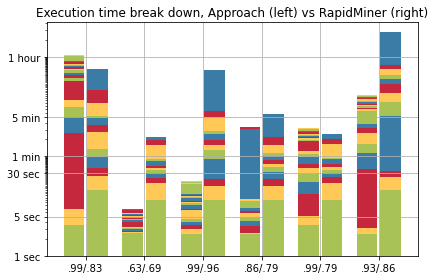

In [80]:
with open('result_final_breadth-first.pkl', 'rb') as file:
        data = pickle.load(file)

"""
57    1068  2.476022  0.094351  2.570372
109   1468  3.503321  1.640952  5.144273
148   1485  2.514328  0.607893  3.122221
286  23381  2.559163  0.103651  2.662814
316    300  3.496449  3.372727  6.869176
366     38  2.506182  0.501999  3.008182
"""
        
import pandas as pd
from functools import reduce
tmp = []
for k in [300, 23381, 38, 1068, 1468, 1485]:
    if data[k]:
#         print(k)
        times = [v[-2] for v in data[k]]
        avg = np.nanmedian(times)
        times = [v if not pd.isna(v) else avg for v in times]
#         print(times)
#         tmp.append(np.nanmax(reduce(lambda x, y: x + y, [v[-1] for v in data[k] if v])))
# print(tmp)

res = {
    'Approach': {
#         151: [],
        300: [3.496, 3.372, 148.1574597709632, 148.1574597709632, 148.1574597709632, 148.1574597709632, 711.2308404408782, 20.11302110026019, 148.1574597709632, 58.340317726135254, 148.1574597709632, 148.1574597709632, 242.47350571029756, 148.1574597709632, 148.1574597709632, 54.4694081347249, 148.1574597709632, 126.89853276623018, 242.47350571029756, 148.1574597709632, 711.2308404408782, 148.1574597709632],
#         40978: [],
        23381: [2.559, 0.103, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.7726194205816765, 0.26340215979972087, 0.1609453980540795, 0.021849039474999846, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.1609453980540795, 0.05917083478324827, 0.1609453980540795, 0.7726194205816765, 0.26340215979972087, 0.1609453980540795, 0.021849039474999846],
        38: [2.5, 0.5, 0.5167121815698568, 0.5167121815698568, 0.5167121815698568, 2.14755453846855, 0.1781382655381103, 1.3122102730648608, 0.5167121815698568, 0.5167121815698568, 0.5167121815698568, 1.123922876310952, 0.5167121815698568, 0.5167121815698568, 0.5167121815698568, 0.5167121815698568, 6.299273872472171, 0.5167121815698568, 0.4824280669541885, 0.1781382655381103, 0.5167121815698568, 0.5167121815698568],
        1068: [2.47, 0.09, 0.8184291998241017, 0.8184291998241017, 0.8184291998241017, 0.8184291998241017, 0.500080991913383, 0.8184291998241017, 2.4006420244846174, 0.8184291998241017, 0.06788817490352364, 176.60613189850505, 0.8184291998241017, 0.42832500122634054, 0.8184291998241017, 0.8184291998241017, 0.8184291998241017, 5.053864169294412, 0.8184291998241017, 0.8184291998241017, 0.8184291998241017, 0.8184291998241017],
#         23517: [],
#         1590: [],
        1468: [3.5, 1.64, 7.806802754356243, 7.806802754356243, 7.806802754356243, 7.806802754356243, 7.806802754356243, 13.764054473247656, 7.806802754356243, 7.806802754356243, 40.37315335630178, 1.1417194519236245, 3.311699184687455, 8.41018626316224, 7.806802754356243, 3.0919662686267366, 7.806802754356243, 7.203419245550244, 7.806802754356243, 7.806802754356243, 13.764054473247656, 7.806802754356243],
        1485: [2.5, 0.6, 32.861377851042285, 32.861377851042285, 32.861377851042285, 57.93739243063758, 32.861377851042285, 32.861377851042285, 169.94376433286885, 32.861377851042285, 4.805869379575601, 13.015094021598482, 35.40121574574219, 13.940021499361825, 30.321539956342374, 32.861377851042285, 32.861377851042285, 32.861377851042285, 32.861377851042285, 32.861377851042285, 35.40121574574219, 32.861377851042285],
        'auc': [0.9996388001479038, 0.6285245393176427, 0.994596116750279, 0.865323, 0.9958506944444444, 0.9297146449704144], 
        'labels': ['Data Profiling', 'Suggestion'] + [f'Candidate #{i+1}' for i in range(20)],
    },
    'RapidMiner': {
#         151: [10, 10, 10, 10, 10, 5, 79, 37, 7, 98, 122, 14*60+40],
        300: [15, 12, 10, 21, 23, 79, 60, 66, 32, 3*60+50, 5*60+59, 20*60+39],
#         40978: [8, 10, 4, 20, 15, 14, 17, 26, 14, 37, 51, 8*60+1],
        23381: [10, 10, 5, 5, 4, 3, 4, 8, 4, 44, 22, 12],
        38: [10, 8, 6, 30, 24, 19, 21, 35, 19, 136, 74, 29*60+12],
        1068: [10, 8, 6, 8, 6, 6, 8, 10, 6, 28, 38, 3*60+32],
#         23517: [10, 8, 6, 15, 16, 14, 3*60+13, 51, 20, 5*60+55, 2*60+58, 1*3600+12*60+58],
#         1590: [10, 10, 8, 7, 10, 12, 3*60+17, 50, 10, 115, 2*60+22, 2*3600+30*60+10],
        1468: [10, 10, 6, 4, 4, 5, 5, 9, 4, 43, 21, 30],
        1485: [15, 11, 7, 4*60+47, 3*60+58, 4*60+17, 5*60+50, 4*60+38, 3*60+58, 8*60, 7*60+42, 2*3600],
        'auc': [0.748, 0.832, 0.854, 0.685, 0.963, 0.787, 0.53, 0.892, 0.794, 0.859],
        'labels': ['Data Loading', 'Task Selection', 'Feature Selection', 'Naive Bayes', 'Generalized Linear Model',
                   'Logistic Regression', 'Fast Large MArgin', 'Deep Learning', 'Decision Tree', 'Random Forest',
                   'Gradient Boosting Trees', 'Support Vector Machines'],
    },
}

colors = {
    "g": (168./255, 194./255, 86./255),
    "y": (255./255, 200./255, 87./255),
    "r": (197./255, 40./255, 61./255),
    "b": (58./255, 124./255, 165./255)
}

from collections import defaultdict
width = 0.35
fig = plt.figure()
ax = fig.add_subplot(111)
sums = defaultdict(float)
for idx, k in enumerate([300, 23381, 38, 1068, 1468, 1485]):
    for i in range(22):
        ax.bar(idx - 0.2, res['Approach'][k][i], width, bottom=sums.get(k) , label=res['Approach']['labels'][idx], color=list(colors.values())[i%4])
        sums[k] += res['Approach'][k][i]

sums = defaultdict(float)
for idx, k in enumerate([300, 23381, 38, 1068, 1468, 1485]):
    for i in range(12):
        ax.bar(idx +.2, res['RapidMiner'][k][i], width, bottom=sums.get(k) , label=res['RapidMiner']['labels'][idx], color=list(colors.values())[i%4])
        sums[k] += res['RapidMiner'][k][i]

ax.set_xticklabels(['', '.99/.83', '.63/.69', '.99/.96', '.86/.79', '.99/.79', '.93/.86'])
ax.set_yscale('log', base=60)
ax.set_yticks([1, 5, 30, 60, 300, 3600])
ax.set_yticklabels(['1 sec', '5 sec', '30 sec', '1 min', '5 min', '1 hour'])
plt.title('Execution time break down, Approach (left) vs RapidMiner (right)')
plt.grid()
# plt.show()
plt.tight_layout()
plt.savefig('exp-7.pdf', dpi=600)

In [12]:
from numpy.random import randint
from sklearn.metrics import mean_squared_error as mse

def distance(A, B):
    return mse(A, B)


def incremental_farthest_search(points, k, offset=None):
    remaining_points = points[:]
    solution_set = []
    _offset = offset if offset is not None else randint(0, len(remaining_points) - 1)
    solution_set.append(remaining_points.pop(_offset))
    for _ in range(k-1):
        distances = [distance(p, solution_set[0]) for p in remaining_points]
        for i, p in enumerate(remaining_points):
            for j, s in enumerate(solution_set):
                distances[i] = min(distances[i], distance(p, s))
        solution_set.append(remaining_points.pop(distances.index(max(distances))))
    return solution_set

In [26]:
df = pd.read_csv('data_profiles.csv')
df.head()


,did,PCASkewnessFirstPC,PCAKurtosisFirstPC,PCAFractionOfComponentsFor95PercentVariance,Landmark1NN,LandmarkRandomNodeLearner,LandmarkDecisionNodeLearner,LandmarkDecisionTree,LandmarkNaiveBayes,LandmarkLDA,...,NumberOfFeatures,NumberOfClasses,NumberOfInstances,LogInverseDatasetRatio,LogDatasetRatio,PercentageOfMissingValues,PercentageOfFeaturesWithMissingValues,PercentageOfInstancesWithMissingValues,LogNumberOfFeatures,LogNumberOfInstances
0,3,0.177032,-1.275639,0.328767,0.906447,0.535358,0.660522,0.993431,0.627346,0.939299,...,36.0,2.0,3196.0,4.486136,-4.486136,0.0,0.0,0.0,3.583519,8.069655
1,6,0.033800,-0.388208,0.750000,0.952200,0.059200,0.066550,0.877950,0.642550,0.703000,...,16.0,26.0,20000.0,7.130899,-7.130899,0.0,0.0,0.0,2.772589,9.903488
2,11,0.316385,-0.222992,0.800000,0.622400,0.523200,0.555200,0.755200,0.835200,0.918400,...,4.0,3.0,625.0,5.051457,-5.051457,0.0,0.0,0.0,1.386294,6.437752
3,12,0.028900,-0.961654,0.138889,0.963500,0.185000,0.175500,0.882500,0.924500,0.980000,...,216.0,10.0,2000.0,2.225624,-2.225624,0.0,0.0,0.0,5.375278,7.600902
4,14,-0.416411,-0.637459,0.763158,0.789500,0.132500,0.177000,0.724500,0.761000,0.808000,...,76.0,10.0,2000.0,3.270169,-3.270169,0.0,0.0,0.0,4.330733,7.600902


In [28]:
from sklearn.preprocessing import normalize
normalized, norms = normalize(df.drop(columns=['did']), norm='max', axis=0, return_norm=True)
normalized

array([[ 1.19390023e-02, -2.93334312e-03,  3.28767123e-01, ...,
         0.00000000e+00,  4.78944397e-01,  7.03211507e-01],
       [ 2.27948599e-03, -8.92687119e-04,  7.50000000e-01, ...,
         0.00000000e+00,  3.70561969e-01,  8.63016590e-01],
       [ 2.13369027e-02, -5.12772800e-04,  8.00000000e-01, ...,
         0.00000000e+00,  1.85280985e-01,  5.61003025e-01],
       ...,
       [-1.70814322e-03, -4.04262094e-04,  1.00000000e+00, ...,
         0.00000000e+00,  3.86303905e-01,  5.48264287e-01],
       [-1.34992671e-19, -1.73275213e-03,  6.42857143e-01, ...,
         0.00000000e+00,  2.39472199e-01,  9.33332020e-01],
       [ 3.62199975e-03, -2.56924078e-03,  7.14285714e-01, ...,
         0.00000000e+00,  3.52715234e-01,  8.02273356e-01]])

In [57]:
from itertools import product
tmp = [list(arr) for arr in normalized]
# print(tmp)
values = []
for offset in df.index:
    # print(df.did.iloc[offset])
    close_match = incremental_farthest_search(tmp, 11, offset)
    dist = [distance(a, b) for a, b in product(close_match, close_match)]
#     print(dist)
    values.append([np.max(dist), np.median(dist), np.mean(dist)])
    print(offset, [df.did.iloc[tmp.index(arr)] for arr in close_match], )
#     break

0 [3, 300, 1590, 40978, 23381, 1053, 38, 151, 1468, 469, 40966]
1 [6, 40978, 1590, 151, 1485, 1068, 38, 23381, 1468, 23517, 4134]
2 [11, 151, 4134, 38, 1590, 1053, 300, 1468, 23381, 40978, 40966]
3 [12, 151, 38, 40978, 23381, 1068, 1590, 23517, 1485, 4134, 1486]
4 [14, 38, 151, 40978, 23381, 1068, 1590, 1485, 4134, 41027, 1468]
5 [15, 1468, 151, 38, 1590, 23381, 40978, 6, 4134, 1053, 1485]
6 [16, 38, 151, 40978, 23381, 1068, 1590, 1485, 4134, 23517, 1468]
7 [18, 38, 151, 40978, 1068, 23381, 1590, 1468, 4134, 1485, 1486]
8 [22, 38, 151, 40978, 23381, 1068, 1590, 1485, 4134, 41027, 1468]
9 [23, 40978, 38, 151, 1590, 1468, 1053, 4134, 300, 23381, 1486]
10 [28, 40978, 1590, 1053, 23517, 23381, 38, 1485, 151, 40994, 4134]
11 [29, 151, 40978, 38, 300, 1468, 1590, 4134, 1053, 1486, 469]
12 [31, 151, 1468, 38, 40978, 300, 1590, 4134, 1053, 40966, 23381]
13 [32, 38, 4134, 151, 23381, 1068, 1590, 1485, 1468, 40978, 1486]
14 [37, 1468, 38, 151, 1590, 40978, 23381, 300, 1053, 4134, 40966]
15 [38, 

In [56]:
# !pip install nds
from nds import ndomsort
fronts = ndomsort.non_domin_sort(values)
res = []
for front in fronts:
    # print(fronts[front])
    for candidate in fronts[front]:
        res.append(candidate)
res = res[::-1]
# res
# [38, 300, 151, 40978, 23381, 1068]
values.index(res[0])

20

{1049: [(8365, 98.18181818181819, 2, 55, nan, [0.9410238502663256]), (8885, 100.0, 1, 55, nan, [0.942284058988764]), (8315, 92.72727272727273, 5, 55, nan, [0.9331403523584948]), (8351, 87.27272727272727, 8, 55, nan, [0.9321848976274834]), (7754, 40.0, 34, 55, nan, [0.6993460323033708]), (5909, 90.9090909090909, 6, 55, 1.5201000699365077, [0.93298]), (8788, 12.727272727272727, 49, 55, nan, [0.4974240018906409]), (5910, 85.45454545454545, 9, 55, 4.458804879024212, [0.927954]), (8456, 52.72727272727273, 27, 55, 0.1260913215717223, [0.8098022816531419]), (7026, 54.54545454545455, 26, 55, 0.9288196840298824, [0.8098029999999999]), (5804, 96.36363636363636, 3, 55, 2.3827309776774155, [0.936249]), (8815, 60.0, 23, 55, nan, [0.8523266284933875]), (6840, 36.36363636363637, 36, 55, 0.7955445192567053, [0.6592613296363178]), (8353, 21.818181818181817, 44, 55, nan, [0.6042200711025281]), (5914, 32.72727272727273, 38, 55, 328.01736974662117, [0.636907]), (8817, 20.0, 45, 55, nan, [0.596280775031016

1.25 0.9017
2.25 0.98495
3.25 0.9763
4.25 0.0
5.25 0.0
1.25 0.0
2.25 0.0
3.25 0.0
4.25 0.9668652325570385
5.25 0.9668652325570385
[1.272, 299.1178, 3603.3541999999998, 6.904975612735958, 27.532380366853154]
1.25 1.272
2.25 299.1178
3.25 3603.3541999999998
4.25 0.0
5.25 0.0
1.25 0.0
2.25 0.0
3.25 0.0
4.25 6.904975612735958
5.25 27.532380366853154


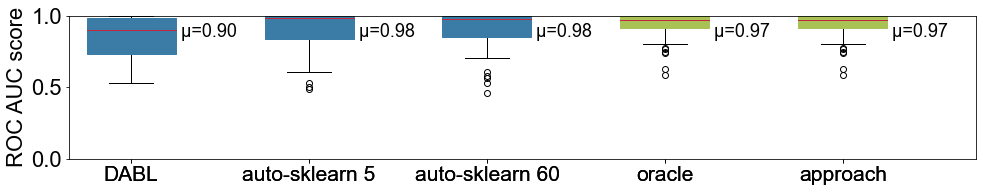

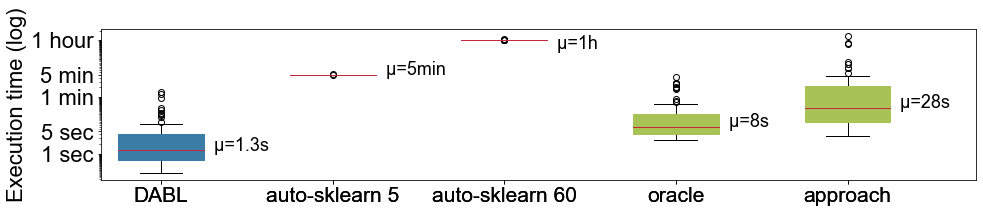

In [13]:
inp = {
    'DABL': """0.9870,0.0270,0.9295,0.0012
1.0158,0.0066,0.7702,0.0300
1.0150,0.0034,0.6908,0.0731
0.5221,0.1016,0.7284,0.0867
0.7196,0.1376,0.7462,0.0384
0.6067,0.1568,0.7371,0.0877
0.3916,0.0039,0.7269,0.0308
13.9024,0.2614,0.9982,0.0007
1.5174,0.0155,0.9744,0.0010
6.0869,1.9797,0.5876,0.1651
0.2493,0.0150,0.9996,0.0002
0.4363,0.0064,0.6997,0.0592
1.8573,0.0111,0.9587,0.0024
2.4365,0.0658,0.6903,0.0057
56.6707,1.1014,0.9962,0.0010
0.3600,0.0061,0.7532,0.0000
9.7153,0.0681,0.7722,0.0439
18.5507,2.0055,0.9750,0.0059
0.8235,0.0224,0.8973,0.0101
0.3442,0.0010,0.8655,0.0015
0.9045,0.0044,0.9017,0.0152
1.0692,0.0848,0.9599,0.0132
0.5283,0.0310,0.9932,0.0050
8.7457,0.1534,0.9946,0.0001
1.5769,0.1769,0.7152,0.0081
0.3187,0.0169,0.9953,0.0010
7.7726,0.3404,0.9037,0.0007
1.3255,0.0354,0.9962,0.0002
1.3701,0.0388,0.9638,0.0037
2.3823,0.0243,0.9751,0.0017
1.2720,0.0988,0.7350,0.0563
1.4200,0.0142,0.9822,0.0004
1.0096,0.0011,0.6872,0.0171
0.6481,0.0055,0.5753,0.0112
4.5159,0.1421,0.5307,0.0002
16.0487,0.5860,0.9989,0.0000
0.5512,0.0075,0.8691,0.0195
0.7550,0.0548,0.9798,0.0081
74.1946,0.2268,0.9989,0.0001
0.9934,0.0535,0.7157,0.0043
0.6935,0.0292,0.7621,0.0039
3.2760,0.1413,0.9946,0.0013
0.4480,0.0074,0.8320,0.0240
5.9998,0.4184,0.9924,0.0029
0.7978,0.0597,0.9370,0.0369
4.1026,0.4232,0.9999,0.0000
27.9168,2.6322,0.6943,0.0107
7.3569,0.5643,0.9914,0.0003
1.1017,0.0308,0.8585,0.0112
161.8511,6.0525,nan,nan
53.1328,0.6259,nan,nan
1.1581,0.2005,0.8147,0.0278
1.0538,0.0661,0.6800,0.1172
1.9731,0.2649,0.8356,0.0099
17.1115,0.6235,0.9979,0.0006
1.7129,0.1745,0.8459,0.0283
0.3536,0.0089,0.9687,0.0102
0.8873,0.0085,0.9699,0.0021
0.2981,0.0061,0.9387,0.0062
8.4140,3.4192,0.6833,0.0066
23.4972,2.5986,0.7998,0.0037
0.5916,0.0204,0.9588,0.0028
1.4751,0.0933,0.9609,0.0130
1.7414,0.0911,0.6704,0.0193
2.7562,0.0129,0.9997,0.0003
3.8202,0.0396,0.9922,0.0025
0.6107,0.0030,0.5396,0.0029
0.3795,0.0126,0.8537,0.1009
1.3860,0.0740,0.9159,0.0047
84.4591,8.0895,0.9936,0.0000
0.6405,0.0425,0.5579,0.0346""",
    'auto-sklearn 5': """301.7387,3.1660,0.8401,0.1009
298.4012,1.1407,0.7594,0.0254
299.3002,0.0483,0.7785,0.0215
298.2074,0.3555,0.9278,0.0211
299.4811,0.0458,0.9984,0.0008
299.3205,1.2349,0.9820,0.0006
4.2753,1.4550,nan,nan
297.1764,0.5597,1.0000,0.0000
298.5180,0.0371,0.7771,0.0222
297.9592,0.0228,0.9965,0.0003
299.1503,0.0975,0.7852,0.0037
298.9613,0.3149,0.9956,0.0009
2.8705,0.0668,nan,nan
298.9908,0.1391,0.9020,0.0115
300.6540,0.8625,0.9748,0.0121
298.0858,1.5769,0.8918,0.0109
297.7150,1.2017,0.5000,0.0000
298.6302,0.1445,0.9188,0.0164
298.9175,0.2706,0.9998,0.0002
301.4510,0.1235,0.9927,0.0052
297.6949,1.4934,0.9939,0.0007
303.1460,1.5097,0.7363,0.0095
297.5394,1.1092,0.9948,0.0004
2.7371,0.0491,nan,nan
299.3495,0.4445,0.9975,0.0001
299.5381,0.7720,0.9619,0.0012
298.7963,0.4692,0.9879,0.0021
3.3281,0.2302,nan,nan
298.7868,0.0192,0.9784,0.0013
298.3290,2.2050,0.7315,0.0088
2.7446,0.0581,nan,nan
304.6777,0.7944,0.5314,0.0003
299.7641,0.1551,0.9993,0.0000
3.0322,0.1351,nan,nan
4.1454,1.3014,nan,nan
298.6398,0.3052,0.9987,0.0001
2.8628,0.0170,nan,nan
2.7378,0.0522,nan,nan
298.2809,0.1973,0.4871,0.0106
297.3866,0.1270,0.7293,0.0204
299.4877,1.5106,0.9168,0.0007
299.0853,0.2314,0.7363,0.0679
300.4603,0.3097,0.6050,0.0235
297.1217,1.0415,0.9140,0.0058
301.1182,0.1982,0.9794,0.0049
299.6584,0.8415,0.9423,0.0042
298.7415,0.4602,0.7798,0.0076
299.3473,0.3256,0.9991,0.0006
298.5045,1.0104,0.8385,0.0275
298.9939,0.2421,0.9939,0.0032
299.9874,0.1823,0.9955,0.0018
297.9007,0.9124,1.0000,0.0000
300.3923,0.4299,0.6988,0.0298
299.4828,0.3363,0.9939,0.0001
301.6155,1.7698,0.9200,0.0072
136.6374,1.4179,nan,nan
49.1771,0.1142,nan,nan
346.9214,14.2672,nan,nan
349.5405,0.0560,nan,nan
352.3586,1.2100,nan,nan
362.0512,3.6653,nan,nan
370.7704,0.8553,nan,nan
350.5297,2.4363,nan,nan
356.0352,0.8746,nan,nan
404.4420,46.6478,nan,nan
297.9501,0.0028,1.0000,0.0000
299.6205,0.3789,1.0000,0.0000
301.7281,1.3080,1.0000,0.0000
300.8016,0.2521,1.0000,0.0000
300.1746,0.3845,1.0000,0.0000
298.1756,0.2238,1.0000,0.0000
299.8288,0.3265,1.0000,0.0000
300.9907,0.0344,1.0000,0.0000
298.6825,1.0513,1.0000,0.0000
299.4888,0.0537,1.0000,0.0000
298.4416,0.4031,1.0000,0.0000
301.4734,1.5907,1.0000,0.0000""",
    'auto-sklearn 60': """1461,3605.9185,0.4576
1462,3597.0512,1.0000
1464,3601.2359,1.0000
1468,3608.1359,0.9592
1475,3608.9313,0.7896
1478,3603.2564,0.9968
1480,3610.6867,0.7286
1485,3603.3908,0.8828
1486,3605.8500,0.9785
1487,3604.3547,0.8967
1489,3599.0483,0.9482
1494,3602.1710,0.9127
1497,3605.2691,0.9998
15,3599.9966,0.9933
1501,3603.8908,0.9953
151,3610.4232,0.7945
1510,3604.2792,0.9948
1590,3602.2859,0.9172
16,3608.9604,0.9983
18,3601.9131,0.9679
182,3601.2837,0.9889
188,3599.0834,0.7020
22,3598.5245,0.9809
23,3600.1132,0.7240
23381,3602.0899,0.6084
23517,3604.3029,0.5303
28,3600.9791,0.9992
29,3601.4129,0.9149
3,3602.2651,0.9847
300,3605.4102,0.9988
307,3937.6743,0.9487
31,3603.8604,0.7781
32,3602.7947,0.9996
37,3597.4777,0.8326
375,3605.5212,0.9940
38,3607.1933,0.9971
40499,3601.5391,1.0000
40668,3607.9272,0.7483
40670,3603.3176,0.9940
40701,3605.3598,0.9185
40927,48.4017,nan
40966,3603.7471,1.0000
40975,3596.9829,1.0000
40978,3611.7451,1.0000
40979,3609.7217,1.0000
40982,3591.5559,1.0000
40983,3600.3579,1.0000
40984,3601.6078,1.0000
40994,3589.3373,1.0000
41027,3591.3926,0.7019
4134,3598.2244,0.8535
44,3598.4382,0.9741
4534,3603.8334,0.9703
4538,3600.5986,0.7012
458,3615.6425,0.9969
46,3620.4022,0.9939
469,3613.7435,0.5753
50,3586.6496,0.8588
54,3623.6224,0.9270
6,3607.3791,0.9987
6332,3608.5316,0.5619
""",
     'oracle': """1049,4.178683949407334,0.942284058988764
1050,4.432849895320689,0.856570111111111
1053,13.07244450055005,0.7698081111111111
1063,2.8270766186070504,0.8320340767948797
1067,4.8499711404701245,0.8457023333333334
1068,8.442665712181867,0.865323
11,2.89490112499476,0.99999375
12,30.2353193853352,0.9993
1461,45.73793658848416,0.9293072439652204
1462,4.825056936738197,1.0
1464,2.6578404330857044,0.7453861720485195
1468,12.951076035453655,0.9958506944444444
1475,13.800001819025878,0.8734002464771028
1478,260.21190445264426,0.9996468924268176
1480,3.863039119026388,0.7752705555555556
1485,35.98359884408428,0.9297146449704144
1486,106.4059252320412,0.994185
1487,6.611750963676621,0.9117619205232002
1489,5.983070276181367,0.966259354002966
1494,3.904004707353857,0.9327430036488724
1497,7.550238986233378,0.9999794928394578
15,3.6871642177140127,0.9928790157458912
1501,17.326836010440026,0.999038
151,19.97755081797711,0.9615070161653354
1510,4.069258383353473,0.9949262723957508
1590,163.27884688737387,0.922927
18,4.872834742327451,0.967471111111111
182,51.492559556987416,0.99278
188,4.125466710538522,0.9108875282367176
22,40.309851151995076,0.9883613333333332
23,3.9154064823904746,0.7413869999999999
23381,2.984704459590825,0.6285245393176427
28,23.806159136400904,0.999905
29,3.814195027347278,0.9319580125399832
300,155.02663615875005,0.9996388001479038
307,123.46757319456117,0.9998
31,6.373932831937829,0.7993531666666667
32,13.670061505497491,0.99978096313872
37,3.801675128672256,0.8284827825242405
375,11.440358169748205,0.9999587480603233
38,3.524893753530306,0.994596116750279
40668,111.94434580686116,0.9216339524913508
40966,7.536090872168089,0.9998536127017054
40975,6.454889294184866,0.9994671749339754
40979,7.705771402358549,0.9989134404761904
40982,6.535296199832475,0.9500501290116358
40983,7.108074172254189,0.9900466123064312
40984,6.585114096409608,0.9957263107263108
40994,6.701877053217728,0.9519890864284456
41027,9.432685055393097,0.9558426446500592
4134,160.66304836250686,0.8815239249939386
44,8.938519845996584,0.9880155755754344
4534,10.832669999201707,0.9967635762833592
4538,20.273346151611364,0.917083
458,4.337261927267292,0.9999155191525034
46,6.050913315632659,0.995029
469,2.733975314465435,0.5826640000000001
50,2.866809726104851,1.0
54,3.6496458436453443,0.962006
6,15.626160090839393,0.9997021681340932""",
    'approach': """1049,33.06058527820098,0.942284058988764
1050,22.03048727224538,0.856570111111111
1053,104.97389905723425,0.7698081111111111
1063,6.776393194366038,0.8320340767948797
1067,18.949245339147414,0.8457023333333334
1068,18.93895633954539,0.865323
11,4.516329786993094,0.99999375
12,472.1508496413707,0.9993
1461,158.33689687892405,0.9293072439652204
1462,10.031120952720723,1.0
1464,3.5759150024726463,0.7453861720485195
1468,161.28032836822226,0.9958506944444444
1475,211.13247742437133,0.8734002464771028
1478,5043.026162354201,0.9996468924268176
1480,5.755608054213036,0.7752705555555556
1485,660.3497780138877,0.9297146449704144
1486,751.2651568460612,0.994185
1487,81.92019707657197,0.9117619205232002
1489,25.83227656285432,0.966259354002966
1494,9.207567501416738,0.9327430036488724
1497,52.16588011224079,0.9999794928394578
15,5.42413223750474,0.9928790157458912
1501,71.94490897297642,0.999038
151,261.062708095276,0.9615070161653354
1510,14.44766480604652,0.9949262723957508
1590,482.47613372212163,0.922927
18,28.97295141736506,0.967471111111111
182,201.2736530835168,0.99278
188,13.776778582947564,0.9108875282367176
22,327.5956485202412,0.9883613333333332
23,6.259826828757042,0.7413869999999999
23381,5.881721624564256,0.6285245393176427
28,125.53525032526744,0.999905
29,6.645938682474123,0.9319580125399832
300,2970.0183718070507,0.9996388001479038
307,8.449007103315948,0.9998
31,29.926712686367427,0.7993531666666667
32,84.31978524387873,0.99978096313872
37,8.520059294443275,0.8284827825242405
375,129.43078437408064,0.9999587480603233
38,13.342425203357585,0.994596116750279
40668,274.7325504430436,0.9216339524913508
40966,27.55803482543562,0.9998536127017054
40975,6.97091429785138,0.9994671749339754
40979,27.506725908270685,0.9989134404761904
40982,10.262754402838459,0.9500501290116358
40983,12.129491169410784,0.9900466123064312
40984,9.887940859924349,0.9957263107263108
40994,10.205117202053248,0.9519890864284456
41027,26.924720409616075,0.9558426446500592
4134,2736.1309479670676,0.8815239249939386
44,103.96993753501346,0.9880155755754344
4534,98.67378644147738,0.9967635762833592
4538,274.8963171346228,0.917083
458,19.86624908726173,0.9999155191525034
46,33.09643560269195,0.995029
469,3.652799494434297,0.5826640000000001
50,4.817869019924441,1.0
54,11.63277263318986,0.962006
6,113.31863176177993,0.9997021681340932""",
}


colors = {
    "g": (48./255, 135./255, 16./255),
    "y": (255./255, 200./255, 87./255),
    "r": (197./255, 40./255, 61./255),
    "b": (58./255, 124./255, 165./255)
}


from matplotlib.transforms import Affine2D
import matplotlib.font_manager
SMALL_SIZE=22
plt.rcParams['font.size'] = 18
plt.rc('font', family='Arial')
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=21)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# fig, ax1 = plt.subplots(figsize=(12, 4))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
fig = plt.figure(figsize=(14, 3))
ax1 = fig.add_subplot(111)
plt.rcParams['font.size'] = 18
# ax2 = ax1.twinx()

column_names = {
    3: ['did', 'time', 'auc'],
    4: ['time', 'stime', 'auc', 'sauc'],
}

names, times, mtimes, stimes, aucs, maucs, saucs = [], [], [], [], [], [], []
for idx, (k, v) in enumerate(inp.items()):
    if not v:
        continue
    columns = column_names.get(len(v.splitlines()[0].split(',')))
    df = pd.read_csv(StringIO(v.replace(' ', ',')), names=columns).dropna()
#     df.boxplot(ax=ax1)
#     time = [float(l.split(',')[0]) for l in v.splitlines()]
    mtime = np.nanmedian(df.time)
    mtimes.append(mtime)
    stime = np.nanstd(df.time)
#     auc = [float(l.split(',')[2]) for l in v.splitlines()]
    mauc = np.nanmedian(df.auc)
#     sauc = np.nanstd(df.auc)
    maucs.append(mauc)
    names.append(k)
    times.append(df.time)
    aucs.append(df.auc)
    stimes.append(stime)
#     saucs.append(sauc)
# print(names, mtimes, maucs)

# x = range(1, len(names) + 1)
# eaucs = np.array([[a-b, a+b] for a, b in zip(maucs, saucs)])
# etimes = np.array([[a-b, a+b] for a, b in zip(mtimes, stimes)])

box1 = ax1.boxplot(aucs[:3] + [[0], [0]], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])
    
    for i, line in enumerate(box1[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = ' μ={:.2f}'.format(maucs[i])
            y = y if y <= .85 else .85
            ax1.annotate(text, xy=(x, y))

box2 = ax1.boxplot([[0], [0], [0]] + aucs[3:], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
    
    for i, line in enumerate(box2[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = ' μ={:.2f}'.format(maucs[i])
            y = y if y <= .85 else .85
            ax1.annotate(text, xy=(x, y))
        
# trans1 = Affine2D().translate(-0.3, 0.0) + ax2.transData
# ax2.boxplot(mtimes, patch_artist=True)
ax1.set_xlim([0.65, 5.75])
ax1.set_xlabel('')
ax1.set_xticklabels(names*2)
# ax1.set_title('Baseline predictive performance, all datasets', y=1.08)
ax1.set_ylabel('ROC AUC score')

plt.tight_layout()
plt.savefig('exp-6-all-a.pdf', dpi=600, bbox_inches='tight')

fig = plt.figure(figsize=(14, 3))
ax2 = fig.add_subplot(111)
print(mtimes)
mtimes = ['1.3s', '5min', '1h', '8s', '28s']
box1 = ax2.boxplot(times[:3] + [[0], [0]], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])
    
    for i, line in enumerate(box1[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = f'  μ={mtimes[i]}'
            y = y if y <= 2000 else 2000
            ax2.annotate(text, xy=(x, y))

box2 = ax2.boxplot([[0], [0], [0]] + times[3:], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
    
    for i, line in enumerate(box2[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = f'  μ={mtimes[i]}'
            ax2.annotate(text, xy=(x, y))

ax2.set_xlabel('')
ax2.set_xticklabels(names*2)
ax2.set_xlim([0.65, 5.75])
# ax2.set_ylim([0, 60])
ax2.set_yscale('log', base=60)
ax2.set_yticks([1, 5, 60, 300, 3600])
ax2.set_yticklabels(['1 sec', '5 sec', '1 min', '5 min', '1 hour'])
ax2.get_yaxis().get_major_formatter().labelOnlyBase = False
# ax2.grid()
# ax2.set_title('Baseline execution time, all datasets', y=1.08)
ax2.set_ylabel('Execution time (log)')
# ax1.grid()
# plt.show()
plt.tight_layout()
plt.savefig('exp-6-all-b.pdf', dpi=600, bbox_inches='tight')

1.25 0.8546
2.25 0.94875
3.25 0.9781500000000001
4.25 0.8095
5.25 0.0
6.25 0.0
1.25 0.0
2.25 0.0
3.25 0.0
4.25 0.0
5.25 0.9621553808603467
6.25 0.9621553808603467
[1.32755, 299.14549999999997, 3606.3017499999996, 1240.0, 10.696870873817762, 90.10964235388383]
1.25 1.32755
2.25 299.14549999999997
3.25 3606.3017499999996
4.25 1240.0
5.25 0.0
6.25 0.0
1.25 0.0
2.25 0.0
3.25 0.0
4.25 0.0
5.25 10.696870873817762
6.25 90.10964235388383


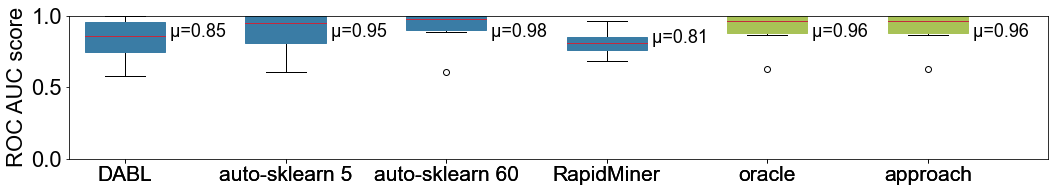

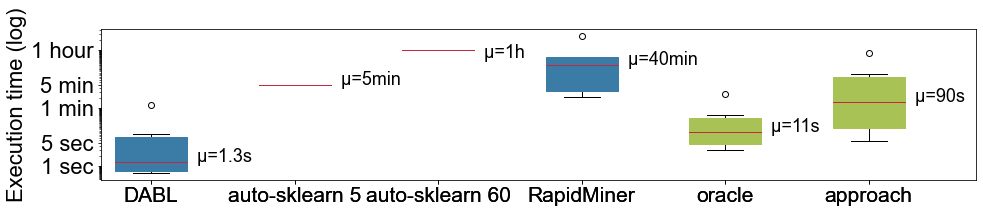

In [14]:
inp = {
    'DABL': """1049,0.9870,0.9295
1050,1.0158,0.7702
1053,1.0150,0.6908
1063,0.5221,0.7284
1067,0.7196,0.7462
1068,0.6067,0.7371
11,0.3916,0.7269
12,13.9024,0.9982
14,1.5174,0.9744
1461,6.0869,0.5876
1462,0.2493,0.9996
1464,0.4363,0.6997
1468,1.8573,0.9587
1475,2.4365,0.6903
1478,56.6707,0.9962
1480,0.3600,0.7532
1485,9.7153,0.7722
1486,18.5507,0.9750
1487,0.8235,0.8973
1489,0.3442,0.8655
1494,0.9045,0.9017
1497,1.0692,0.9599
15,0.5283,0.9932
1501,8.7457,0.9946
151,1.5769,0.7152
1510,0.3187,0.9953
1590,7.7726,0.9037
16,1.3255,0.9962
18,1.3701,0.9638
182,2.3823,0.9751
188,1.2720,0.7350
22,1.4200,0.9822
23,1.0096,0.6872
23381,0.6481,0.5753
23517,4.5159,0.5307
28,16.0487,0.9989
29,0.5512,0.8691
3,0.7550,0.9798
300,74.1946,0.9989
307,0.9934,0.7157
31,0.6935,0.7621
32,3.2760,0.9946
37,0.4480,0.8320
375,5.9998,0.9924
38,0.7978,0.9370
40499,4.1026,0.9999
40668,27.9168,0.6943
40670,7.3569,0.9914
40701,1.1017,0.8585
40923,161.8511,nan
40927,53.1328,nan
40966,1.1581,0.8147
40975,1.0538,0.6800
40978,1.9731,0.8356
40979,17.1115,0.9979
40982,1.7129,0.8459
40983,0.3536,0.9687
40984,0.8873,0.9699
40994,0.2981,0.9387
41027,8.4140,0.6833
4134,23.4972,0.7998
44,0.5916,0.9588
4534,1.4751,0.9609
4538,1.7414,0.6704
458,2.7562,0.9997
46,3.8202,0.9922
469,0.6107,0.5396
50,0.3795,0.8537
54,1.3860,0.9159
6,84.4591,0.9936
6332,0.6405,0.5579""",
    'auto-sklearn 5': """1063,301.7387,0.8401
1067,298.4012,0.7594
1068,299.3002,0.7785
11,298.2074,0.9278
12,299.4811,0.9984
14,299.3205,0.9820
1461,4.2753,nan
1462,297.1764,1.0000
1464,298.5180,0.7771
1468,297.9592,0.9965
1475,299.1503,0.7852
1478,298.9613,0.9956
1480,2.8705,nan
1485,298.9908,0.9020
1486,300.6540,0.9748
1487,298.0858,0.8918
1489,297.7150,0.5000
1494,298.6302,0.9188
1497,298.9175,0.9998
15,301.4510,0.9927
1501,297.6949,0.9939
151,303.1460,0.7363
1510,297.5394,0.9948
1590,2.7371,nan
16,299.3495,0.9975
18,299.5381,0.9619
182,298.7963,0.9879
188,3.3281,nan
22,298.7868,0.9784
23,298.3290,0.7315
23381,2.7446,nan
23517,304.6777,0.5314
28,299.7641,0.9993
29,3.0322,nan
3,4.1454,nan
300,298.6398,0.9987
307,2.8628,nan
31,2.7378,nan
1461,298.2809,0.4871
1480,297.3866,0.7293
1590,299.4877,0.9168
188,299.0853,0.7363
23381,300.4603,0.6050
29,297.1217,0.9140
3,301.1182,0.9794
307,299.6584,0.9423
31,298.7415,0.7798
32,299.3473,0.9991
37,298.5045,0.8385
375,298.9939,0.9939
38,299.9874,0.9955
40499,297.9007,1.0000
40668,300.3923,0.6988
40670,299.4828,0.9939
40701,301.6155,0.9200
40923,136.6374,nan
40927,49.1771,nan
40966,346.9214,nan
40975,349.5405,nan
40978,352.3586,nan
40979,362.0512,nan
40982,370.7704,nan
40983,350.5297,nan
40984,356.0352,nan
40994,404.4420,nan
41027,297.9501,1.0000
4134,299.6205,1.0000
44,301.7281,1.0000
4534,300.8016,1.0000
4538,300.1746,1.0000
458,298.1756,1.0000
46,299.8288,1.0000
469,300.9907,1.0000
50,298.6825,1.0000
54,299.4888,1.0000
6,298.4416,1.0000
6332,301.4734,1.0000""",
    'auto-sklearn 60': """1049,3606.1644,1.0000
1050,3604.4877,1.0000
1053,3601.8430,1.0000
1063,3605.0103,1.0000
1067,3609.3747,1.0000
1068,3608.3268,1.0000
11,3609.4671,1.0000
12,3601.3859,1.0000
14,4.2064,nan
1461,3605.9185,0.4576
1462,3597.0512,1.0000
1464,3601.2359,1.0000
1468,3608.1359,0.9592
1475,3608.9313,0.7896
1478,3603.2564,0.9968
1480,3610.6867,0.7286
1485,3603.3908,0.8828
1486,3605.8500,0.9785
1487,3604.3547,0.8967
1489,3599.0483,0.9482
1494,3602.1710,0.9127
1497,3605.2691,0.9998
15,3599.9966,0.9933
1501,3603.8908,0.9953
151,3610.4232,0.7945
1510,3604.2792,0.9948
1590,3602.2859,0.9172
16,3608.9604,0.9983
18,3601.9131,0.9679
182,3601.2837,0.9889
188,3599.0834,0.7020
22,3598.5245,0.9809
23,3600.1132,0.7240
23381,3602.0899,0.6084
23517,3604.3029,0.5303
28,3600.9791,0.9992
29,3601.4129,0.9149
3,3602.2651,0.9847
300,3605.4102,0.9988
307,3937.6743,0.9487
31,3603.8604,0.7781
32,3602.7947,0.9996
37,3597.4777,0.8326
375,3605.5212,0.9940
38,3607.1933,0.9971
40499,3601.5391,1.0000
40668,3607.9272,0.7483
40670,3603.3176,0.9940
40701,3605.3598,0.9185
40927,48.4017,nan
40966,3603.7471,1.0000
40975,3596.9829,1.0000
40978,3611.7451,1.0000
40979,3609.7217,1.0000
40982,3591.5559,1.0000
40983,3600.3579,1.0000
40984,3601.6078,1.0000
40994,3589.3373,1.0000
41027,3591.3926,0.7019
4134,3598.2244,0.8535
44,3598.4382,0.9741
4534,3603.8334,0.9703
4538,3600.5986,0.7012
458,3615.6425,0.9969
46,3620.4022,0.9939
469,3613.7435,0.5753
50,3586.6496,0.8588
54,3623.6224,0.9270
6,3607.3791,0.9987
6332,3608.5316,0.5619""",
    'RapidMiner': """300,2146,0.748
23381,131,0.832
38,2134,0.854
1068,346,0.685
1468,151,0.963
1485,9823,0.787""",
        'oracle': """1068,8.442665712181867,0.865323
1468,12.951076035453655,0.9958506944444444
1485,35.98359884408428,0.9297146449704144
1486,106.4059252320412,0.994185
1487,6.611750963676621,0.9117619205232002
1489,5.983070276181367,0.966259354002966
1494,3.904004707353857,0.9327430036488724
1497,7.550238986233378,0.9999794928394578
15,3.6871642177140127,0.9928790157458912
1501,17.326836010440026,0.999038
151,19.97755081797711,0.9615070161653354
1510,4.069258383353473,0.9949262723957508
1590,163.27884688737387,0.922927
18,4.872834742327451,0.967471111111111
182,51.492559556987416,0.99278
188,4.125466710538522,0.9108875282367176
22,40.309851151995076,0.9883613333333332
23,3.9154064823904746,0.7413869999999999
23381,2.984704459590825,0.6285245393176427
28,23.806159136400904,0.999905
29,3.814195027347278,0.9319580125399832
300,155.02663615875005,0.9996388001479038
307,123.46757319456117,0.9998
31,6.373932831937829,0.7993531666666667
32,13.670061505497491,0.99978096313872
37,3.801675128672256,0.8284827825242405
375,11.440358169748205,0.9999587480603233
38,3.524893753530306,0.994596116750279
40668,111.94434580686116,0.9216339524913508
40966,7.536090872168089,0.9998536127017054
40975,6.454889294184866,0.9994671749339754
40979,7.705771402358549,0.9989134404761904
40982,6.535296199832475,0.9500501290116358
40983,7.108074172254189,0.9900466123064312
40984,6.585114096409608,0.9957263107263108
40994,6.701877053217728,0.9519890864284456
41027,9.432685055393097,0.9558426446500592
4134,160.66304836250686,0.8815239249939386
44,8.938519845996584,0.9880155755754344
4534,10.832669999201707,0.9967635762833592
4538,20.273346151611364,0.917083
458,4.337261927267292,0.9999155191525034
46,6.050913315632659,0.995029
469,2.733975314465435,0.5826640000000001
50,2.866809726104851,1.0
54,3.6496458436453443,0.962006
6,15.626160090839393,0.9997021681340932""",
    'approach': """1049,33.06058527820098,0.942284058988764
1050,22.03048727224538,0.856570111111111
1053,104.97389905723425,0.7698081111111111
1063,6.776393194366038,0.8320340767948797
1067,18.949245339147414,0.8457023333333334
1068,18.93895633954539,0.865323
11,4.516329786993094,0.99999375
12,472.1508496413707,0.9993
1461,158.33689687892405,0.9293072439652204
1462,10.031120952720723,1.0
1464,3.5759150024726463,0.7453861720485195
1468,161.28032836822226,0.9958506944444444
1475,211.13247742437133,0.8734002464771028
1478,5043.026162354201,0.9996468924268176
1480,5.755608054213036,0.7752705555555556
1485,660.3497780138877,0.9297146449704144
1486,751.2651568460612,0.994185
1487,81.92019707657197,0.9117619205232002
1489,25.83227656285432,0.966259354002966
1494,9.207567501416738,0.9327430036488724
1497,52.16588011224079,0.9999794928394578
15,5.42413223750474,0.9928790157458912
1501,71.94490897297642,0.999038
151,261.062708095276,0.9615070161653354
1510,14.44766480604652,0.9949262723957508
1590,482.47613372212163,0.922927
18,28.97295141736506,0.967471111111111
182,201.2736530835168,0.99278
188,13.776778582947564,0.9108875282367176
22,327.5956485202412,0.9883613333333332
23,6.259826828757042,0.7413869999999999
23381,5.881721624564256,0.6285245393176427
28,125.53525032526744,0.999905
29,6.645938682474123,0.9319580125399832
300,2970.0183718070507,0.9996388001479038
307,8.449007103315948,0.9998
31,29.926712686367427,0.7993531666666667
32,84.31978524387873,0.99978096313872
37,8.520059294443275,0.8284827825242405
375,129.43078437408064,0.9999587480603233
38,13.342425203357585,0.994596116750279
40668,274.7325504430436,0.9216339524913508
40966,27.55803482543562,0.9998536127017054
40975,6.97091429785138,0.9994671749339754
40979,27.506725908270685,0.9989134404761904
40982,10.262754402838459,0.9500501290116358
40983,12.129491169410784,0.9900466123064312
40984,9.887940859924349,0.9957263107263108
40994,10.205117202053248,0.9519890864284456
41027,26.924720409616075,0.9558426446500592
4134,2736.1309479670676,0.8815239249939386
44,103.96993753501346,0.9880155755754344
4534,98.67378644147738,0.9967635762833592
4538,274.8963171346228,0.917083
458,19.86624908726173,0.9999155191525034
46,33.09643560269195,0.995029
469,3.652799494434297,0.5826640000000001
50,4.817869019924441,1.0
54,11.63277263318986,0.962006
6,113.31863176177993,0.9997021681340932""",
}

colors = {
    "g": (48./255, 135./255, 16./255),
    "y": (255./255, 200./255, 87./255),
    "r": (197./255, 40./255, 61./255),
    "b": (58./255, 124./255, 165./255)
}


from matplotlib.transforms import Affine2D
import matplotlib.font_manager

SMALL_SIZE=22
plt.rcParams['font.size'] = 18
plt.rc('font', family='Arial')
plt.rc('axes', titlesize=22)     # fontsize of the axes title
plt.rc('axes', labelsize=22)
plt.rc('xtick', labelsize=21)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# fig, ax1 = plt.subplots(figsize=(12, 4))
# fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(14, 6))
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_subplot(111)
# fontsize of the x and y labels
# ax2 = ax1.twinx()

column_names = {
    3: ['did', 'time', 'auc'],
    4: ['time', 'stime', 'auc', 'sauc'],
}

names, times, mtimes, stimes, aucs, maucs, saucs = [], [], [], [], [], [], []
for idx, (k, v) in enumerate(inp.items()):
    if not v:
        continue
    columns = column_names.get(len(v.splitlines()[0].split(',')))
    df = pd.read_csv(StringIO(v.replace(' ', ',')), names=columns).dropna()
    df = df[df.did.isin([300, 23381, 38, 1068, 1468, 1485])]
#     df.boxplot(ax=ax1)
#     time = [float(l.split(',')[0]) for l in v.splitlines()]
    mtime = np.nanmedian(df.time)
    mtimes.append(mtime)
    stime = np.nanstd(df.time)
#     auc = [float(l.split(',')[2]) for l in v.splitlines()]
    mauc = np.nanmedian(df.auc)
#     sauc = np.nanstd(df.auc)
    maucs.append(mauc)
    names.append(k)
    times.append(df.time)
    aucs.append(df.auc)
    stimes.append(stime)
#     saucs.append(sauc)
# print(names, mtimes, maucs)

# x = range(1, len(names) + 1)
# eaucs = np.array([[a-b, a+b] for a, b in zip(maucs, saucs)])
# etimes = np.array([[a-b, a+b] for a, b in zip(mtimes, stimes)])

box1 = ax1.boxplot(aucs[:4] + [[0], [0]], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])
    
    for i, line in enumerate(box1[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = ' μ={:.2f}'.format(maucs[i])
            y = y if y <= .85 else .85
            ax1.annotate(text, xy=(x, y))

box2 = ax1.boxplot([[0], [0], [0], [0]] + aucs[4:], patch_artist=True)
ax1.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
    
    for i, line in enumerate(box2[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = ' μ={:.2f}'.format(maucs[i])
            y = y if y <= .85 else .85
            ax1.annotate(text, xy=(x, y))
        
# trans1 = Affine2D().translate(-0.3, 0.0) + ax2.transData
# ax2.boxplot(mtimes, patch_artist=True)
ax1.set_xlim([0.65, 6.75])
ax1.set_xlabel('')
ax1.set_xticklabels(names*2)
# ax1.set_title('Baseline predictive performance, all datasets', y=1.08)
ax1.set_ylabel('ROC AUC score')

plt.tight_layout()
plt.savefig('exp-6-6-a.pdf', dpi=600, bbox_inches='tight')

fig = plt.figure(figsize=(14, 3))
ax2 = fig.add_subplot(111)

print(mtimes)
mtimes = ['1.3s', '5min', '1h', '40min', '11s', '90s']
box1 = ax2.boxplot(times[:4] + [[0], [0]], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['b'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box1[item], color=colors['r'])
    
    for i, line in enumerate(box1[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = f'  μ={mtimes[i]}'
            y = y if y <= 2000 else 2000
            ax2.annotate(text, xy=(x, y))

box2 = ax2.boxplot([[0], [0], [0], [0]] + times[4:], patch_artist=True)
# ax2.set_ylim([0., 1])
for item in ['boxes']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['g'])
for item in ['medians']: #, 'whiskers', 'fliers', 'medians', 'caps']:
    plt.setp(box2[item], color=colors['r'])
    
    for i, line in enumerate(box2[item]):
        x, y = line.get_xydata()[1]
        print(x, y)
        if y != 0.0:
            text = f'  μ={mtimes[i]}'
            ax2.annotate(text, xy=(x, y))

ax2.set_xlabel('')
ax2.set_xticklabels(names*2)
ax2.set_xlim([0.65, 6.75])
# ax2.set_ylim([0, 60])
ax2.set_yscale('log', base=60)
ax2.set_yticks([1, 5, 60, 300, 3600])
ax2.set_yticklabels(['1 sec', '5 sec', '1 min', '5 min', '1 hour'])
ax2.get_yaxis().get_major_formatter().labelOnlyBase = False
# ax2.grid()
# ax2.grid()
# ax2.set_title('Baseline execution time, six selected datasets', y=1.08)
ax2.set_ylabel('Execution time (log)')
# ax1.grid()
# plt.show()
plt.tight_layout()
plt.savefig('exp-6-6-b.pdf', dpi=600, bbox_inches='tight')

In [18]:
dids = []
artifact = []
plot = np.zeros((5, 5))
win = np.zeros((5, 5), dtype=int)
for i in range(5):
    for j in range(5):
        try:
            f = Path(f'result_{i+1}_{j+1}.pkl')
            if not f.exists():
                continue
            with open(f, 'rb') as file:
                data = pickle.load(file)
                for k, v in data.items():
                    if v:
                        dids.append(k)
                    else:
                        artifact.append((i+1, j+1, k))
            
#             print(data)
            tmp = [min(list(map(lambda x: x[2], v))) for k, v in data.items() if v and k not in [23517, 40978, 41027, 50, 1486]]
            s = sum(np.array(tmp) < 16)
            print(i+1, j+1, s, len(tmp), 1.* s / len(tmp))
            plot[i, j] = 1.* s / len(tmp)
            win[i, j] = sum(np.array(tmp) == 1)
#             win[i, j] = sum(data.values())
#             /np.percentile(tmp, q=np.arange(0, 105, 5))
        except:
            traceback.print_exc()
            continue

from collections import Counter
count = Counter(dids)
for k, v in count.items():
    if v < 25:
        print(k, v)
print(list(set(artifact)))
Counter([c for a, b, c in artifact])

plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(12, 6))
# ax = fig.add_subplot(111)
# ax = fig.axes[0]
ax.matshow(win, cmap=plt.cm.PuBu, aspect="auto")
for i in range(5):
    for j in range(5):
        c = plot[j,i]
        g = win[i, j]
        ax.text(i, j, f"{g}/63", va='center', ha='center', color='k' if (j == 0) and (i < 2) else 'white')
ax.set_xticklabels([0, 1, 2, 3, 4,5 ])
ax.set_yticklabels([0, 1, 2, 3, 4,5 ])
ax.set_ylabel('# suggested candidates, n')
ax.set_xlabel('# iterations per candidate, k')
ax.xaxis.set_label_position('bottom')
# ax.xaxis.tick_top()
# plt.colorbar(ax)
ax.set_title('# top-1 performing candidates found')
plt.tight_layout()
plt.savefig('exp-3i.pdf', dpi=600, bbox_inches='tight')
plt.close(fig)

1 1 55 63 0.873015873015873
1 2 57 63 0.9047619047619048
1 3 59 63 0.9365079365079365
1 4 60 63 0.9523809523809523
1 5 61 63 0.9682539682539683
2 1 59 63 0.9365079365079365
2 2 61 63 0.9682539682539683
2 3 61 63 0.9682539682539683
2 4 61 63 0.9682539682539683
2 5 63 63 1.0
3 1 59 63 0.9365079365079365
3 2 62 63 0.9841269841269841
3 3 62 63 0.9841269841269841
3 4 62 63 0.9841269841269841
3 5 63 63 1.0
4 1 61 63 0.9682539682539683
4 2 63 63 1.0
4 3 63 63 1.0
4 4 63 63 1.0
4 5 63 63 1.0
5 1 61 63 0.9682539682539683
5 2 63 63 1.0
5 3 63 63 1.0
5 4 63 63 1.0
5 5 63 63 1.0
23517 17
40978 9
41027 24
50 24
1486 24
[(5, 4, 40978), (2, 5, 50), (4, 4, 23517), (3, 3, 40978), (3, 4, 23517), (1, 1, 1486), (4, 1, 40978), (2, 4, 40978), (4, 3, 40978), (5, 1, 40978), (5, 3, 40978), (5, 4, 23517), (3, 5, 40978), (4, 5, 40978), (5, 5, 41027), (5, 5, 40978), (4, 3, 23517), (5, 3, 23517), (3, 5, 23517), (4, 2, 40978), (4, 5, 23517), (2, 5, 40978), (4, 4, 40978), (5, 2, 40978), (5, 5, 23517), (3, 2, 40978),

<ipython-input-18-5b2de41665bb>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 1, 2, 3, 4,5 ])
<ipython-input-18-5b2de41665bb>:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0, 1, 2, 3, 4,5 ])


In [44]:
nodes = pd.read_csv('pipeline_nodes.csv')
nodes


,pid,Pipeline,Imputer,DecisionTreeClassifier,OneHotEncoder,OneHotEncoderComponent,StackingEstimator,LinearDiscriminantAnalysis,ExtraTreesClassifier,RandomForestClassifier,...,ZeroPredictor,S1_Branch_Pipeline,HPOSVM,ModelRandomizer,RandomTreesEmbedding,MangoSearchCV,FKC_EigenPro,MemoryEfficientVarianceThreshold,Model,MultiLabelEncoder
0,7761,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8452,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18269,1,0,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5604,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,7013,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,18264,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3926,18270,1,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3927,9033,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3928,7778,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
runs = pd.read_csv('runs.csv')

In [46]:
runs

,run_id,flow_id,rflow_id,dataset_id,user_id,task_id,flow,task,auc_roc_mean,auc_roc_std,...,rmse_55,rmse_60,rmse_65,rmse_70,rmse_75,rmse_80,rmse_85,rmse_90,rmse_95,rmse_100
0,1837413,4830,2629,1049,1526,3902,sklearn.ensemble.forest.RandomForestClassifier...,Supervised Classification,0.909092,0.000000,...,0.262129,0.262129,0.262129,0.262129,0.262129,0.262129,0.262129,0.262129,0.262129,0.262129
1,1836399,4834,3404,1049,1526,3902,sklearn.tree.tree.DecisionTreeClassifier(3),Supervised Classification,0.729986,0.000000,...,0.329713,0.329713,0.329713,0.329713,0.329713,0.329713,0.329713,0.329713,0.329713,0.329713
2,1838550,4835,3413,1049,1526,3902,sklearn.svm.classes.SVC(4),Supervised Classification,0.642918,0.000000,...,0.323109,0.323109,0.323109,0.323109,0.323109,0.323109,0.323109,0.323109,0.323109,0.323109
3,2088175,5804,5804,1049,1104,3902,sklearn.pipeline.Pipeline(pca=sklearn.decompos...,Supervised Classification,0.936249,0.000000,...,0.246778,0.246778,0.246778,0.246778,0.246778,0.246778,0.246778,0.246778,0.246778,0.246778
4,1860525:1874581:1874582:1874584:1874585:187458...,5909,5909,1049,1022,3902,sklearn.pipeline.Pipeline(imputer=sklearn.prep...,Supervised Classification,0.932980,0.000631,...,0.256996,0.257065,0.257171,0.257316,0.257461,0.257485,0.257508,0.258442,0.260287,0.262132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,10045185:10045270:10045329:10045456:10045522:1...,8815,8815,6332,1,14968,sklearn.pipeline.Pipeline(columntransformer=sk...,Supervised Classification,0.775990,0.019251,...,0.453830,0.455097,0.457090,0.458797,0.462152,0.463951,0.465432,0.468245,0.474104,0.506389
3270,9613276:9613315:9613379:9613851:9613880:961394...,8817,8817,6332,6892,14968,sklearn.pipeline.Pipeline(columntransformer=sk...,Supervised Classification,0.640603,0.141093,...,0.614636,0.644061,0.649786,0.649786,0.649786,0.649786,0.672199,0.708415,0.729028,0.772202
3271,9864556:9864594:9865052:9865073:9865324:986554...,8834,8834,6332,6892,14968,sklearn.pipeline.Pipeline(columntransformer=sk...,Supervised Classification,0.554258,0.106986,...,0.494472,0.494909,0.495375,0.495842,0.496937,0.499040,0.501191,0.516685,0.649786,0.760117
3272,9918568,8885,8885,6332,869,14954,sklearn.pipeline.Pipeline(imputation=preproces...,Supervised Classification,0.902106,0.000000,...,0.354388,0.354388,0.354388,0.354388,0.354388,0.354388,0.354388,0.354388,0.354388,0.354388


In [47]:
runs.task.unique()

array(['Supervised Classification'], dtype=object)

In [165]:
import difflib
nodes = pd.read_csv('pipeline_nodes.csv')
rs = {'Cross-Validator': ['GreedSearch', ' CalibratedClassifier', ' RandomizedSearch', ' HalvingRandomSearch', 'GridSearchCV', 'BeamSearchCV', 'CalibratedClassifierCV', 'RidgeClassifier', 'LightClassifier', 'RandomizedSearchCV', 'HalvingRandomSearchCV', 'ModelRandomizer', 'HalvingRandomSearchCV', 'RandomizedSearchCV'],
'Ensembles': ['AdaBoostClassifier', ' VotingClassifier', ' BaggingClassifie', 'AdaBoostClassifier', 'RandomForestClassifier', 'KerasClassifier', 'VotingClassifier', 'BaggingClassifier', 'RidgeClassifier', 'BaggingClassifier', 'VotingClassifier', 'RidgeClassifier'],
'Estimators': ['DecisionTreeClassifier', ' ExtraTreeClassifier', ' RandomForestClassifier', ' SVC', ' LogisticRegression', ' GaussianNB', 'DecisionTreeClassifier', 'DecisionStumpClassifier', 'DecisionStumpClassifierV3', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'KerasClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'RandomSubgroupClassifier', 'SVC', 'NuSVC', 'LogisticRegression', 'LinearRegression', 'GaussianNB'],
'Imputers': ['Conditional', ' Median', ' KNN', ' Dual', ' MissingIndicator', 'ConditionalImputer', 'ConditionalImputer2', 'KMeans', 'MissingIndicator'],
'Scalers': ['MinMax', ' Standard', ' MaxAbs', 'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler'],
'Reducers': ['TruncatedSVD', ' PCA', ' FeatureAgglomeration', ' GaussianRandomProjection', ' RFE', 'TruncatedSVD', 'PCA', 'FeatureAgglomeration', 'FeatureUnion', 'GaussianRandomProjection', 'RFE'],
'Selectors': ['SelectFromModel', ' VarianceThreshold', ' SelectKBest', ' SelectPercentile', 'SelectFromModel', 'VarianceThreshold', 'MemoryEfficientVarianceThreshold', 'SelectKBest', 'SelectPercentile'],
'Generators': ['PolynomialFeatures', 'PolynomialFeatures'],
'Samplers': ['ADASYN', 'SMOTE', 'RandomOverSampler'],
'Transformers': ['FunctionTransformer', 'QuantileTransformer', 'Binarizer', 'KBinsDiscretizer', 'Scalers', 'OneHotEncoder', 'FunctionTransformer', 'QuantileTransformer', 'ColumnTransformer', 'QuantileTransformer', 'FunctionTransformer', 'PowerTransformer', 'Binarizer', 'KBinsDiscretizer', 'KBinsDiscretizer', 'Binarizer', 'RobustScaler', 'MinMaxScaler', 'MaxAbsScaler', 'OneHotEncoder', 'OneHotEncoderComponent', 'TargetEncoder'],}
for k, v in rs.items():
    a = []
    print(k)
    for w in set(v):
        a += difflib.get_close_matches(w.strip(), nodes.columns)
    tmp = list(set(a + v))
    tmp = [b.strip() for b in tmp]
    nd = nodes[nodes.columns[nodes.columns.isin(tmp)]]
    print(nodes.pid[np.sum(nd == True, axis=1) == 0].to_list())

Cross-Validator
[7761, 8452, 18269, 5604, 7013, 8446, 7985, 17600, 18533, 18255, 9016, 9002, 18241, 18527, 7991, 12787, 17827, 17833, 7946, 18296, 5823, 18282, 7952, 17358, 8136, 7205, 9228, 8888, 18719, 7577, 8122, 13102, 9214, 18057, 17402, 9572, 9566, 18725, 17416, 18043, 17370, 9200, 8687, 18094, 8877, 7588, 8863, 18080, 8042, 8724, 8730, 7403, 9348, 8056, 7365, 6053, 9360, 18123, 17576, 8718, 9406, 9412, 18137, 9374, 7359, 8081, 17589, 8095, 8903, 18686, 8917, 17748, 17990, 8526, 7173, 8240, 5764, 5770, 18309, 7167, 8254, 8532, 17984, 7629, 17774, 18447, 5758, 18321, 9162, 8268, 9176, 5994, 18335, 17760, 18453, 9610, 17953, 8283, 9189, 8297, 17947, 18484, 7832, 7826, 18490, 18491, 7827, 7833, 18485, 9188, 17946, 17952, 8282, 18334, 5995, 9177, 8269, 9611, 18452, 17761, 18446, 17775, 9605, 9163, 18320, 5981, 5759, 8255, 7166, 10754, 18308, 5771, 17985, 8533, 8527, 7614, 9639, 17991, 17749, 5765, 8241, 7172, 8916, 18687, 8902, 8094, 8080, 17588, 9413, 9375, 6046, 18136, 18122, 9361,

In [166]:
import difflib
nodes = pd.read_csv('pipeline_nodes.csv')
rs = {'Cross-Validator': ['GreedSearch', ' CalibratedClassifier', ' RandomizedSearch', ' HalvingRandomSearch', 'GridSearchCV', 'BeamSearchCV', 'CalibratedClassifierCV', 'RidgeClassifier', 'LightClassifier', 'RandomizedSearchCV', 'HalvingRandomSearchCV', 'ModelRandomizer', 'HalvingRandomSearchCV', 'RandomizedSearchCV'],
'Ensembles': ['AdaBoostClassifier', ' VotingClassifier', ' BaggingClassifie', 'AdaBoostClassifier', 'RandomForestClassifier', 'KerasClassifier', 'VotingClassifier', 'BaggingClassifier', 'RidgeClassifier', 'BaggingClassifier', 'VotingClassifier', 'RidgeClassifier'],
'Estimators': ['DecisionTreeClassifier', ' ExtraTreeClassifier', ' RandomForestClassifier', ' SVC', ' LogisticRegression', ' GaussianNB', 'DecisionTreeClassifier', 'DecisionStumpClassifier', 'DecisionStumpClassifierV3', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'KerasClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'RandomSubgroupClassifier', 'SVC', 'NuSVC', 'LogisticRegression', 'LinearRegression', 'GaussianNB'],
'Imputers': ['Conditional', ' Median', ' KNN', ' Dual', ' MissingIndicator', 'ConditionalImputer', 'ConditionalImputer2', 'KMeans', 'MissingIndicator'],
'Scalers': ['MinMax', ' Standard', ' MaxAbs', 'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler'],
'Reducers': ['TruncatedSVD', ' PCA', ' FeatureAgglomeration', ' GaussianRandomProjection', ' RFE', 'TruncatedSVD', 'PCA', 'FeatureAgglomeration', 'FeatureUnion', 'GaussianRandomProjection', 'RFE'],
'Selectors': ['SelectFromModel', ' VarianceThreshold', ' SelectKBest', ' SelectPercentile', 'SelectFromModel', 'VarianceThreshold', 'MemoryEfficientVarianceThreshold', 'SelectKBest', 'SelectPercentile'],
'Generators': ['PolynomialFeatures'],
'Samplers': ['ADASYN', 'SMOTE', 'RandomOverSampler'],
'Transformers': ['FunctionTransformer', 'QuantileTransformer', 'Binarizer', 'KBinsDiscretizer', 'Scalers', 'OneHotEncoder', 'FunctionTransformer', 'QuantileTransformer', 'ColumnTransformer', 'QuantileTransformer', 'FunctionTransformer', 'PowerTransformer', 'Binarizer', 'KBinsDiscretizer', 'KBinsDiscretizer', 'Binarizer', 'RobustScaler', 'MinMaxScaler', 'MaxAbsScaler', 'OneHotEncoder', 'OneHotEncoderComponent', 'TargetEncoder'],}
from collections import defaultdict

res = defaultdict(list)
from scipy import stats
for did in [1049,1050,1053,1063,1067,1068,11,12,1461,1462,1464,1468,1475,1478,1480,1485,1486,1487,1489,1494,1497,15,1501,151,1510,1590,18,182,188,22,23,23381,28,29,300,307,31,32,37,375,38,40668,40966,40975,40979,40982,40983,40984,40994,41027,4134,44,4534,4538,458,46,469,50,54,6]:
    print(did)
    res['did'].append(int(did))
    reduced = runs[runs['dataset_id'] == did]
    print(reduced['auc_roc_mean'])
    for k, v in rs.items():
        a = []
        print(k)
        for w in set(v):
            a += difflib.get_close_matches(w.strip(), nodes.columns)
        tmp = list(set(a + v))
        tmp = [b.strip() for b in tmp]
        nd = nodes[nodes.columns[nodes.columns.isin(tmp)]]
        left = nodes.pid[np.sum(nd == True, axis=1) == 0].to_list()
        bla = reduced[reduced['flow_id'].isin(left)]
        if not bla.empty:
            out = stats.percentileofscore(reduced['auc_roc_mean'].to_list(), np.nanmax(bla.auc_roc_mean))
            res[k].append(100 - out)
#         else:
#             res[k].append(None)
        print(out)

1049
0      0.909092
1      0.729986
2      0.642918
3      0.936249
4      0.932980
         ...   
319    0.852327
320    0.596281
321    0.609169
322    0.942284
323    0.932586
Name: auc_roc_mean, Length: 94, dtype: float64
Cross-Validator
99.46808510638297
Ensembles
82.44680851063829
Estimators
82.44680851063829
Imputers
95.2127659574468
Scalers
99.46808510638297
Reducers
99.46808510638297
Selectors
95.2127659574468
Generators
99.46808510638297
Samplers
99.46808510638297
Transformers
99.46808510638297
1050
47     0.830874
48     0.651769
49     0.641886
50     0.856570
51     0.838391
         ...   
362    0.711452
363    0.530328
364    0.576122
365    0.844562
366    0.835145
Name: auc_roc_mean, Length: 86, dtype: float64
Cross-Validator
99.4186046511628
Ensembles
92.44186046511628
Estimators
92.44186046511628
Imputers
99.4186046511628
Scalers
99.4186046511628
Reducers
97.09302325581395
Selectors
99.4186046511628
Generators
99.4186046511628
Samplers
99.4186046511628
Transformer

100.0
Selectors
100.0
Generators
100.0
Samplers
100.0
Transformers
100.0
1475
897    0.836640
898    0.722115
899    0.766343
900    0.873897
901    0.859284
902    0.843986
903    0.535107
904    0.542805
905    0.673859
906    0.861859
907    0.805106
908    0.627738
909    0.851474
910    0.856653
911    0.721877
912    0.671729
913    0.712720
914    0.674238
915    0.815598
916    0.608491
917    0.831283
918    0.725647
919    0.861583
920    0.629927
921    0.860714
922    0.637185
923    0.873400
924    0.718254
925    0.560083
926    0.627745
927    0.872003
928    0.498686
929    0.498702
930    0.499072
931    0.500143
932    0.499694
933    0.498694
934    0.499260
935    0.498693
936    0.789278
937    0.576654
938    0.584163
939    0.871103
940    0.857638
Name: auc_roc_mean, dtype: float64
Cross-Validator
100.0
Ensembles
100.0
Estimators
95.45454545454545
Imputers
100.0
Scalers
100.0
Reducers
100.0
Selectors
100.0
Generators
100.0
Samplers
100.0
Transformers
100.0
1478


100.0
Imputers
78.68852459016394
Scalers
96.72131147540983
Reducers
100.0
Selectors
100.0
Generators
100.0
Samplers
100.0
Transformers
98.36065573770492
1501
1340    0.986520
1341    0.860178
1342    0.997244
1343    0.991613
1344    0.984740
1345    0.999038
1346    0.587932
1347    0.581899
1348    0.848139
1349    0.968232
1350    0.983979
1351    0.979220
1352    0.962030
1353    0.990349
1354    0.987348
1355    0.994690
1356    0.864371
1357    0.803966
1358    0.981873
1359    0.771904
1360    0.994759
1361    0.940033
1362    0.999015
1363    0.991875
1364    0.983646
1365    0.695339
1366    0.984122
1367    0.743791
1368    0.996762
1369    0.975023
1370    0.673295
1371    0.962297
1372    0.986156
1373    0.495104
1374    0.495123
1375    0.496787
1376    0.498583
1377    0.495308
1378    0.495172
1379    0.495333
1380    0.913812
1381    0.795790
1382    0.614554
1383    0.993729
1384    0.984182
Name: auc_roc_mean, dtype: float64
Cross-Validator
100.0
Ensembles
100.0
Esti

100.0
Ensembles
100.0
Estimators
100.0
Imputers
100.0
Scalers
100.0
Reducers
100.0
Selectors
100.0
Generators
100.0
Samplers
100.0
Transformers
100.0
23381
1825    0.547007
1826    0.513875
1827    0.631856
1828    0.512745
1829    0.560755
1830    0.581919
1831    0.560755
1832    0.624604
1833    0.573357
1834    0.585222
1835    0.613883
1836    0.617477
1837    0.564274
1838    0.551069
1839    0.594056
1840    0.579146
1841    0.550082
1842    0.591363
1843    0.633317
1844    0.624002
1845    0.509622
1846    0.624063
1847    0.517990
1848    0.620390
1849    0.553368
1850    0.525082
1851    0.585222
1852    0.621207
1853    0.528505
1854    0.628525
1855    0.545541
1856    0.540158
1857    0.532403
1858    0.621626
1859    0.552159
1860    0.615654
1861    0.585646
1862    0.532325
1863    0.520173
1864    0.590486
1865    0.629058
Name: auc_roc_mean, dtype: float64
Cross-Validator
100.0
Ensembles
100.0
Estimators
92.6829268292683
Imputers
95.1219512195122
Scalers
100.0
Reduce

81.81818181818181
Generators
100.0
Samplers
100.0
Transformers
100.0
40668
2448    0.756967
2449    0.915375
2450    0.861362
2451    0.927204
2452    0.665821
2453    0.573881
2454    0.849922
2455    0.696742
2456    0.952225
2457    0.705495
2458    0.851560
2459    0.887111
2460    0.919965
2461    0.573735
2462    0.616241
2463    0.535700
2464    0.759024
2465    0.822891
2466    0.547633
2467    0.919738
2468    0.875436
2469    0.921634
2470    0.867057
2471    0.619290
2472    0.579277
2473    0.922753
Name: auc_roc_mean, dtype: float64
Cross-Validator
92.3076923076923
Ensembles
100.0
Estimators
100.0
Imputers
92.3076923076923
Scalers
96.15384615384616
Reducers
100.0
Selectors
88.46153846153847
Generators
100.0
Samplers
100.0
Transformers
23.076923076923077
40966
2510    0.914711
2511    0.987487
2512    0.995406
2513    0.798763
2514    0.849021
2515    0.995527
2516    0.822657
2517    0.999854
2518    0.998151
2519    0.770973
2520    0.973191
2521    0.999739
Name: auc_roc

97.82608695652173
Scalers
93.47826086956522
Reducers
100.0
Selectors
97.82608695652173
Generators
100.0
Samplers
100.0
Transformers
97.82608695652173
46
2900    0.984855
2901    0.933522
2902    0.987575
2903    0.975765
2904    0.975590
2905    0.980619
2906    0.921601
2907    0.812658
2908    0.995029
2909    0.994956
2910    0.633641
2911    0.630749
2912    0.911251
2913    0.763076
2914    0.990950
2915    0.986204
2916    0.987719
2917    0.989511
2918    0.990047
2919    0.990674
2920    0.931433
2921    0.873655
2922    0.994615
2923    0.858119
2924    0.991106
2925    0.967492
2926    0.993576
2927    0.990679
2928    0.985934
2929    0.991161
2930    0.709263
2931    0.991082
2932    0.732370
2933    0.994690
2934    0.963194
2935    0.932894
2936    0.763076
2937    0.987705
2938    0.990568
2939    0.621773
2940    0.993970
2941    0.957358
2942    0.680274
2943    0.990529
2944    0.987583
2945    0.990457
2946    0.976394
2947    0.790426
2948    0.685767
2949    0.9935

In [167]:
for k, v in res.items():
    print(k, round(np.nanmax(v)), round(np.nanmean(v)), round(np.nanstd(v)))

did 41027 7304 14457
Cross-Validator 8 1 2
Ensembles 33 6 9
Estimators 38 10 9
Imputers 69 9 17
Scalers 11 2 3
Reducers 6 1 1
Selectors 60 7 15
Generators 6 0 1
Samplers 6 0 1
Transformers 77 4 12


In [168]:
import difflib
nodes = pd.read_csv('pipeline_nodes.csv')
rs = {'Cross-Validator': ['GreedSearch', ' CalibratedClassifier', ' RandomizedSearch', ' HalvingRandomSearch', 'GridSearchCV', 'BeamSearchCV', 'CalibratedClassifierCV', 'RidgeClassifier', 'LightClassifier', 'RandomizedSearchCV', 'HalvingRandomSearchCV', 'ModelRandomizer', 'HalvingRandomSearchCV', 'RandomizedSearchCV'],
'Ensembles': ['AdaBoostClassifier', ' VotingClassifier', ' BaggingClassifie', 'AdaBoostClassifier', 'RandomForestClassifier', 'KerasClassifier', 'VotingClassifier', 'BaggingClassifier', 'RidgeClassifier', 'BaggingClassifier', 'VotingClassifier', 'RidgeClassifier'],
'Estimators': ['DecisionTreeClassifier', ' ExtraTreeClassifier', ' RandomForestClassifier', ' SVC', ' LogisticRegression', ' GaussianNB', 'DecisionTreeClassifier', 'DecisionStumpClassifier', 'DecisionStumpClassifierV3', 'ExtraTreeClassifier', 'ExtraTreesClassifier', 'KerasClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'RandomSubgroupClassifier', 'SVC', 'NuSVC', 'LogisticRegression', 'LinearRegression', 'GaussianNB'],
'Imputers': ['Conditional', ' Median', ' KNN', ' Dual', ' MissingIndicator', 'ConditionalImputer', 'ConditionalImputer2', 'KMeans', 'MissingIndicator'],
'Scalers': ['MinMax', ' Standard', ' MaxAbs', 'MinMaxScaler', 'StandardScaler', 'MaxAbsScaler'],
'Reducers': ['TruncatedSVD', ' PCA', ' FeatureAgglomeration', ' GaussianRandomProjection', ' RFE', 'TruncatedSVD', 'PCA', 'FeatureAgglomeration', 'FeatureUnion', 'GaussianRandomProjection', 'RFE'],
'Selectors': ['VarianceThreshold', 'SelectKBest', 'SelectPercentile', 'SelectFromModel', 'VarianceThreshold', 'MemoryEfficientVarianceThreshold', 'SelectKBest', 'SelectPercentile'],
'Generators': ['PolynomialFeatures'],
'Samplers': ['ADASYN', 'SMOTE', 'RandomOverSampler'],
'Transformers': ['FunctionTransformer', 'QuantileTransformer', 'Binarizer', 'KBinsDiscretizer', 'Scalers', 'OneHotEncoder', 'FunctionTransformer', 'QuantileTransformer', 'ColumnTransformer', 'QuantileTransformer', 'FunctionTransformer', 'PowerTransformer', 'Binarizer', 'KBinsDiscretizer', 'KBinsDiscretizer', 'Binarizer', 'RobustScaler', 'MinMaxScaler', 'MaxAbsScaler', 'OneHotEncoder', 'OneHotEncoderComponent', 'TargetEncoder'],}
from collections import defaultdict

res = defaultdict(list)
from scipy import stats
for did in [1049,1050,1053,1063,1067,1068,11,12,1461,1462,1464,1468,1475,1478,1480,1485,1486,1487,1489,1494,1497,15,1501,151,1510,1590,18,182,188,22,23,23381,28,29,300,307,31,32,37,375,38,40668,40966,40975,40979,40982,40983,40984,40994,41027,4134,44,4534,4538,458,46,469,50,54,6]:
#     print(did)
    res['did'].append(int(did))
    reduced = runs[runs['dataset_id'] == did]
#     print(runs.shape, reduced.shape)
#     print(reduced['auc_roc_mean'])
    for k, v in rs.items():
        a = []
#         print(k)
        for w in set(v):
            a += difflib.get_close_matches(w.strip(), nodes.columns)
        tmp = list(set(a + v))
        tmp = [b.strip() for b in tmp]
        nd = nodes[nodes.columns[nodes.columns.isin(tmp)]]
#         print(nd)
        left = nodes.pid[np.sum(nd == True, axis=1) <= 1].to_list()
        bla = reduced[reduced['flow_id'].isin(left)]
        if not bla.empty:
            out = stats.percentileofscore(reduced['auc_roc_mean'].to_list(), np.nanmax(bla.auc_roc_mean))
            res[k].append(100 - out)
        else:
            out == 100
#             res[k].append(None)
        
#         print(out)
    

In [169]:
print(res)
for k, v in res.items():
    print(k, round(np.nanmax(v)), round(np.nanmean(v)), round(np.nanstd(v)))
#     print(v)

defaultdict(<class 'list'>, {'did': [1049, 1050, 1053, 1063, 1067, 1068, 11, 12, 1461, 1462, 1464, 1468, 1475, 1478, 1480, 1485, 1486, 1487, 1489, 1494, 1497, 15, 1501, 151, 1510, 1590, 18, 182, 188, 22, 23, 23381, 28, 29, 300, 307, 31, 32, 37, 375, 38, 40668, 40966, 40975, 40979, 40982, 40983, 40984, 40994, 41027, 4134, 44, 4534, 4538, 458, 46, 469, 50, 54, 6], 'Cross-Validator': [0.5319148936170279, 0.581395348837205, 0.625, 0.5102040816326507, 0.5555555555555571, 0.47169811320755173, 0.7936507936507979, 0.0, 0.0, 5.555555555555557, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8888888888888857, 0.0, 0.0], 'Ensembles': [0.5319148936170279, 0.581395348837205, 0.625, 0.5102040816326507, 0.5555555555555571, 0.47169811320755173, 0.7936507936507979, 0.0, 0.0, 5.555555555555557, 0.0, 0.0, 0.0, 0.0, 0.0